In [1]:
# Import libraries
import matplotlib.pyplot as plt; import numpy as np; import netCDF4; from netCDF4 import Dataset
import pandas as pd; import numpy.ma as ma; import time as timeit; import os; import math
import itertools; import scipy.io; import mat73; import collections
import cartopy; import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import AutoMinorLocator; from matplotlib.ticker import FixedLocator
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
%matplotlib inline
import statistics; import xarray as xr; import matplotlib as mpl; import gsw

In [2]:
# Read in ETOPO file
file_in ='Etopo1_Bed_35_65N_40_80W.nc'
NC=Dataset(file_in); DS=xr.open_dataset(file_in)

projection= ccrs.PlateCarree(central_longitude=255);
data_crs = ccrs.PlateCarree()

latNC= NC['lat'][:]
lonNC= NC['lon'][:]
depthNC= NC['depth'][:]

In [3]:
# Import eco-region shapes
newv = [['', '', '37.00', '', '', '76.00'], ['', '', '36.00', '', '', '75.50'], ['', '', '35.50', '', '', '75.00'], ['', '', '36.00', '', '', '74.75'], ['', '', '37.40', '', '', '74.50'], ['', '', '39.50', '', '', '72.00'], ['', '', '40.50', '', '', '74.00'], ['', '', '39.40', '', '', '74.25'], ['', '', '37.00', '', '', '76.00']]
lon_v = []; lat_v = []
for i in range(9): 
    v1 = newv[i][2]
    lat_v.append(v1)
    v3 = newv[i][5]
    lon_v.append(v3)
lonlist_v = [float(i) for i in lon_v]; latlist_v = [float(i) for i in lat_v]
df_v = pd.DataFrame({'lon': lonlist_v, 'lat': latlist_v,})
lonlist_v_plot = [float(i)*-1 for i in lon_v]; latlist_v = [float(i) for i in lat_v]
df_v_plot = pd.DataFrame({'lon': lonlist_v_plot, 'lat': latlist_v,})
x_v = df_v_plot['lon']; y_v = df_v_plot['lat']

lonlist_vneg = [float(i)*-1 for i in lon_v]
df_v_plottable = pd.DataFrame({'lon': lonlist_vneg, 'lat': latlist_v,})
polygon_v = Polygon(df_v.values.tolist())

In [4]:
neww = [['', '', '40.00', '', '', '69.50'], ['', '', '40.30', '', '', '68.00'], ['', '', '40.40', '', '', '67.50'], ['', '', '40.60', '', '', '67.00'], ['', '', '40.80', '', '', '66.50'], ['', '', '41.45', '', '', '66.00'], ['', '', '41.80', '', '', '65.70'], ['', '', '42.10', '', '', '66.00'], ['', '', '42.10', '', '', '67.00'], ['', '', '42.10', '', '', '67.50'], ['', '', '41.80', '', '', '68.00'], ['', '', '41.10', '', '', '69.00'], ['', '', '41.00', '', '', '69.50'], ['', '', '40.00', '', '', '69.50']]
lon_w = []; lat_w = []
for i in range(14): 
    w1 = neww[i][2]
    lat_w.append(w1)
    w3 = neww[i][5]
    lon_w.append(w3)
lonlist_w = [float(i) for i in lon_w]; latlist_w = [float(i) for i in lat_w]
lonlist_wneg = [float(i)*-1 for i in lon_w]
df_w = pd.DataFrame({'lon': lonlist_w, 'lat': latlist_w,})
df_w_plottable = pd.DataFrame({'lon': lonlist_wneg, 'lat': latlist_w,})

lonlist_w_plot = [float(i)*-1 for i in lon_w]; latlist_w = [float(i) for i in lat_w]
df_w_plot = pd.DataFrame({'lon': lonlist_w_plot, 'lat': latlist_w,})
x_w = df_w_plot['lon']; y_w = df_w_plot['lat']
polygon_w = Polygon(df_w.values)

In [5]:
newy = [['', '', '41.80', '', '', '68.00'], ['', '', '42.10', '', '', '67.50'], ['', '', '42.10', '', '', '67.00'], ['', '', '42.10', '', '', '66.00'], ['', '', '43.00', '', '', '66.00'], ['', '', '44.20', '', '', '66.50'], ['', '', '44.20', '', '', '67.00'], ['', '', '44.20', '', '', '68.00'], ['', '', '41.80', '', '', '68.00']]
lon_y = []; lat_y = []
for i in range(9): 
    y1 = newy[i][2]
    lat_y.append(y1)
    y3 = newy[i][5]
    lon_y.append(y3)
lonlist_y = [float(i) for i in lon_y]; latlist_y = [float(i) for i in lat_y]
df_y = pd.DataFrame({'lon': lonlist_y, 'lat': latlist_y,})
lonlist_y_plot = [float(i)*-1 for i in lon_y]; latlist_y = [float(i) for i in lat_y]
df_y_plot = pd.DataFrame({'lon': lonlist_y_plot, 'lat': latlist_y,})
x_y = df_y_plot['lon']; y_y = df_y_plot['lat']

lonlist_yneg = [float(i)*-1 for i in lon_y]
df_y_plottable = pd.DataFrame({'lon': lonlist_yneg, 'lat': latlist_y,})
polygon_y = Polygon(df_y.values)

In [6]:
newt = [['', '', '42.20', '', '', '70.50'], ['', '', '42.00', '', '', '70.00'], ['', '', '41.10', '', '', '69.00'], ['', '', '41.80', '', '', '68.00'], ['', '', '44.20', '', '', '68.00'], ['', '', '43.90', '', '', '69.00'], ['', '', '43.70', '', '', '70.00'], ['', '', '43.00', '', '', '70.50'], ['', '', '42.20', '', '', '70.50']]
lon_t = []; lat_t = []
for i in range(9): 
    t1 = newt[i][2]
    lat_t.append(t1)
    t3 = newt[i][5]
    lon_t.append(t3)
lonlist_t = [float(i) for i in lon_t]; latlist_t = [float(i) for i in lat_t]
df_t = pd.DataFrame({'lon': lonlist_t, 'lat': latlist_t,})
lonlist_t_plot = [float(i)*-1 for i in lon_t]; latlist_t = [float(i) for i in lat_t]
df_t_plot = pd.DataFrame({'lon': lonlist_t_plot, 'lat': latlist_t,})
x_t = df_t_plot['lon']; y_t = df_t_plot['lat']

lonlist_tneg = [float(i)*-1 for i in lon_t]
df_t_plottable = pd.DataFrame({'lon': lonlist_tneg, 'lat': latlist_t,})
polygon_t = Polygon(df_t.values)

In [7]:
newx = [['', '', '40.50', '', '', '74.00'], ['', '', '39.50', '', '', '72.00'], ['', '', '40.00', '', '', '71.40'], ['', '', '40.00', '', '', '69.50'], ['', '', '41.00', '', '', '69.50'], ['', '', '41.10', '', '', '70.00'], ['', '', '41.00', '', '', '72.00'], ['', '', '40.50', '', '', '74.00']]
lon_x = []; lat_x = []
for i in range(8): 
    x1 = newx[i][2]
    lat_x.append(x1)
    x3 = newx[i][5]
    lon_x.append(x3)
lonlist_x = [float(i) for i in lon_x]; latlist_x = [float(i) for i in lat_x]
df_x = pd.DataFrame({'lon': lonlist_x, 'lat': latlist_x,})
lonlist_x_plot = [float(i)*-1 for i in lon_x]; latlist_x = [float(i) for i in lat_x]
df_x_plot = pd.DataFrame({'lon': lonlist_x_plot, 'lat': latlist_x,})
x_x = df_x_plot['lon']; y_x = df_x_plot['lat']

lonlist_xneg = [float(i)*-1 for i in lon_x]
df_x_plottable = pd.DataFrame({'lon': lonlist_xneg, 'lat': latlist_x,})
polygon_x = Polygon(df_x.values.tolist())

## 3.1 Mean seasonal evolution and spatial patterns of MLDs from density-based criterion

In [8]:
# jan = pd.read_csv('01_glorysfullcomp.csv'); feb = pd.read_csv('02_glorysfullcomp.csv')
# march = pd.read_csv('03_glorysfullcomp.csv'); april = pd.read_csv('04_glorysfullcomp.csv')
# may = pd.read_csv('05_glorysfullcomp.csv'); june = pd.read_csv('06_glorysfullcomp.csv')
# july = pd.read_csv('07_glorysfullcomp.csv'); aug = pd.read_csv('08_glorysfullcomp.csv')
# sept = pd.read_csv('09_glorysfullcomp.csv'); octob = pd.read_csv('10_glorysfullcomp.csv')
# nov = pd.read_csv('11_glorysfullcomp.csv'); dec = pd.read_csv('12_glorysfullcomp.csv')

In [9]:
jan = pd.read_csv('01_finaldataset.csv'); feb = pd.read_csv('02_finaldataset.csv')
march = pd.read_csv('03_finaldataset.csv'); april = pd.read_csv('04_finaldataset.csv')
may = pd.read_csv('05_finaldataset.csv'); june = pd.read_csv('06_finaldataset.csv')
july = pd.read_csv('07_finaldataset.csv'); aug = pd.read_csv('08_finaldataset.csv')
sept = pd.read_csv('09_finaldataset.csv'); octob = pd.read_csv('10_finaldataset.csv')
nov = pd.read_csv('11_finaldataset.csv'); dec = pd.read_csv('12_finaldataset.csv')

In [10]:
winter = [dec, jan, feb]; winter_list = pd.concat(winter); winter_list_reindex = winter_list.reset_index()
spring = [march, april, may]; spring_list = pd.concat(spring); spring_list_reindex = spring_list.reset_index()
summer = [june, july, aug]; summer_list = pd.concat(summer); summer_list_reindex = summer_list.reset_index()
fall = [sept, octob, nov]; fall_list = pd.concat(fall); fall_list_reindex = fall_list.reset_index()

In [11]:
full = [jan.reset_index(), feb.reset_index(), march.reset_index(), april.reset_index(), 
        may.reset_index(), june.reset_index(), july.reset_index(), aug.reset_index(), 
        sept.reset_index(), octob.reset_index(), nov.reset_index(), dec.reset_index()]

In [13]:
full_list = pd.concat(full); full_list_reindex = full_list.reset_index()

In [19]:
print(dec)

     Unnamed: 0  001densmld                       location  obs_lat  obs_lon  \
0             0        32.0     (1993, 70.6833, 40.9, 335)  40.9000  70.6833   
1             1        40.0   (1993, 70.3667, 41.035, 335)  41.0350  70.3667   
2             2        18.0     (1993, 70.03, 41.065, 335)  41.0650  70.0300   
3             3        24.0  (1993, 70.1333, 40.9317, 335)  40.9317  70.1333   
4             4        18.0     (1993, 69.985, 40.93, 335)  40.9300  69.9850   
..          ...         ...                            ...      ...      ...   
238         238         8.0  (2011, 70.2817, 41.0367, 342)  41.0367  70.2817   
239         239        12.0  (2011, 70.3333, 41.0367, 342)  41.0367  70.3333   
240         240        17.0  (2011, 70.3983, 41.0367, 342)  41.0367  70.3983   
241         241        16.0    (2011, 70.5133, 41.06, 342)  41.0600  70.5133   
242         242         NaN   (2010, 69.525, 42.5117, 335)  42.5117  69.5250   

     bottomdepth    year  date_no  003d

In [25]:
value = []
for i in range(len(full_list_reindex['001densmld'])):
    if full_list_reindex['001densmld'][i] < 5:
        value.append(1)
print(len(value))

# value = 6: 2217 instances 003densmld
# value = 5: 5705 instances 003densmld
# value < 5: 70 instances 003densmld

# value = 6: 1814 instances 02tempmld
# value = 5: 3340 instances 02tempmld
# value < 5: 43 instances 02tempmld

# value = 6: 2644 instances 001densmld
# value = 5: 9432 instances 001densmld
# value < 5: 120 instances 001densmld

120


In [14]:
# full_list_reindex = full_list.reset_index()

In [15]:
season = winter_list_reindex
print(len(season['obs_lat']))

4199


In [16]:
season = fall_list_reindex
print(len(season['obs_lat']))
variable = '003densmld'

10637


In [20]:
season = winter_list_reindex
print(len(season['obs_lat']))
variable = '003densmld'

latlist = []; lonlist = []; yearlist = []; variablelist_003 = []; bottomdepthlist = []; diff = []; variablelist_02 = []
variablelist_003_x = [];variablelist_003_v = []; variablelist_003_w = []; variablelist_003_y = []; variablelist_003_t = []
yearlist_x = [];yearlist_v = []; yearlist_w = []; yearlist_y = []; yearlist_t = []
gmld_x = []; gmld03_x = []; gmld01_x = []; diff_x = []
gmld_v = []; gmld03_v = []; gmld01_v = []; diff_v = []
gmld_w = []; gmld03_w = []; gmld01_w = []; diff_w = []
gmld_t = []; gmld03_t = []; gmld01_t = []; diff_y = []
gmld_y = []; gmld03_y = []; gmld01_y = []; diff_t = []

newdf = pd.DataFrame({'lon': list(season['obs_lon']),'lat': list(season['obs_lat'])})
    
for ii in range(len(season)):
    new = newdf.iloc[ii].values
    point = Point(new)
    if polygon_x.contains(point) == True and (season[variable][ii]>5) and (season['bottomdepth'][ii]<=200) : 
        yearlist_x.append(season['year'][ii])
#         gmld_x.append(season['glorys_mld'][ii])
#         gmld03_x.append(season['glorysmld_new003'][ii])
#         gmld01_x.append(season['glorysmld_new001'][ii])
        diff_x.append(season['02tempmld'][ii]-season['003densmld'][ii])
#         diff_x.append(season['02tempmld'][ii])
        variablelist_003_x.append(season['003densmld'][ii])
    if polygon_v.contains(point) == True and (season[variable][ii]>5) and (season['bottomdepth'][ii]<=200) : #and (season['bottomdepth'][ii]<=200) 
        yearlist_v.append(season['year'][ii])
#         gmld_v.append(season['glorys_mld'][ii])
#         gmld03_v.append(season['glorysmld_new003'][ii])
#         gmld01_v.append(season['glorysmld_new001'][ii])
        diff_v.append(season['02tempmld'][ii]-season['003densmld'][ii])
#         diff_v.append(season['02tempmld'][ii])
        variablelist_003_v.append(season['003densmld'][ii])
    if polygon_w.contains(point) == True and (season[variable][ii]>5): #and (season['bottomdepth'][ii]<=200) 
        yearlist_w.append(season['year'][ii])
#         gmld_w.append(season['glorys_mld'][ii])
#         gmld03_w.append(season['glorysmld_new003'][ii])
#         gmld01_w.append(season['glorysmld_new001'][ii])
#         diff_w.append(season['02tempmld'][ii]-season['003densmld'][ii])
        diff_w.append(season['02tempmld'][ii])
        variablelist_003_w.append(season['003densmld'][ii])
    if polygon_t.contains(point) == True and (season[variable][ii]>5): #and (season['bottomdepth'][ii]<=200) 
        yearlist_t.append(season['year'][ii])
#         gmld_t.append(season['glorys_mld'][ii])
#         gmld03_t.append(season['glorysmld_new003'][ii])
#         gmld01_t.append(season['glorysmld_new001'][ii])
#         diff_w.append(season['02tempmld'][ii]-season['003densmld'][ii])
        diff_t.append(season['02tempmld'][ii])
        variablelist_003_t.append(season['003densmld'][ii])
    if polygon_y.contains(point) == True and (season[variable][ii]>5): #and (season['bottomdepth'][ii]<=200) 
        yearlist_y.append(season['year'][ii])
#         gmld_y.append(season['glorys_mld'][ii])
#         gmld03_y.append(season['glorysmld_new003'][ii])
#         gmld01_y.append(season['glorysmld_new001'][ii])
#         diff.append(season['02tempmld'][ii]-season['003densmld'][ii])
        diff_y.append(season['02tempmld'][ii])
        variablelist_003_y.append(season['003densmld'][ii])

# #     elif polygon_v.contains(point) == True and (season[variable][ii]>5) and (season['bottomdepth'][ii]<=200) : #and (season['bottomdepth'][ii]<=200) 
# #         variablelist_003.append(season['003densmld'][ii])
# #         yearlist.append(season['year'][ii])
# #         lonlist.append(season['obs_lon'][ii])
# #         latlist.append(season['obs_lat'][ii])
# #         bottomdepthlist.append(season['bottomdepth'][ii])
# #         diff.append(season['02tempmld'][ii]-season['003densmld'][ii])
#     elif polygon_w.contains(point) == True or polygon_t.contains(point) == True or polygon_y.contains(point) == True:
#         if (season[variable][ii]>5):
#             variablelist_003.append(season['003densmld'][ii])
#             yearlist.append(season['year'][ii])
#             lonlist.append(season['obs_lon'][ii])
#             latlist.append(season['obs_lat'][ii])
#             bottomdepthlist.append(season['bottomdepth'][ii])
#             diff.append(season['02tempmld'][ii]-season['003densmld'][ii])
# pandasnew = pd.DataFrame({'diff': diff, 'lon':lonlist, 'lat':latlist})


pandas_x = pd.DataFrame({'year': yearlist_x, 'variable003': variablelist_003_x,'temp': diff_x}) #, 'gmld':  gmld_x, 'gmld01': gmld01_x, 'gmld03': gmld03_x
pandas_x_drop = pandas_x.dropna(how='all') 
pandas_v = pd.DataFrame({'year': yearlist_v, 'variable003': variablelist_003_v, 'temp': diff_v})
pandas_v_drop = pandas_v.dropna(how='all')
pandas_w = pd.DataFrame({'year': yearlist_w, 'variable003': variablelist_003_w, 'temp': diff_w})
pandas_w_drop = pandas_w.dropna(how='all')
pandas_y = pd.DataFrame({'year': yearlist_y, 'variable003': variablelist_003_y, 'temp': diff_y})
pandas_y_drop = pandas_y.dropna(how='all')
pandas_t = pd.DataFrame({'year': yearlist_t, 'variable003': variablelist_003_t, 'temp': diff_t})
pandas_t_drop = pandas_t.dropna(how='all')

interannual_grouped_003_x = pandas_x_drop.groupby(['year']).mean()
print('x',len(interannual_grouped_003_x))
interannual_grouped_003_x_drop = interannual_grouped_003_x.dropna()


interannual_grouped_003_v = pandas_v_drop.groupby(['year']).mean()
print('v',len(interannual_grouped_003_v))
interannual_grouped_003_v_drop = interannual_grouped_003_v.dropna()


interannual_grouped_003_w = pandas_w_drop.groupby(['year']).mean()
print('w',len(interannual_grouped_003_w))
interannual_grouped_003_w_drop = interannual_grouped_003_w.dropna()


interannual_grouped_003_y = pandas_y_drop.groupby(['year']).mean()
print('y',len(interannual_grouped_003_y))
interannual_grouped_003_y_drop = interannual_grouped_003_y.dropna()

interannual_grouped_003_t = pandas_t_drop.groupby(['year']).mean()
print('t',len(interannual_grouped_003_t))
interannual_grouped_003_t_drop = interannual_grouped_003_t.dropna()
# interannual_grouped_003std = pandas.groupby(['year']).std()
# print(len(interannual_grouped_003))

4199
x 22
v 22
w 22
y 17
t 20


In [39]:
datause1 = interannual_grouped_003_w['variable003']
datause2 = interannual_grouped_003_w['temp']

# dataone = interannual_grouped_003_y
# datatwo = interannual_grouped_003_x

result = pd.merge(datause1, datause2, on="year", how="inner")
print(len(result))

22


In [40]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(datause1, datause2)
print(r_value)
print(p_value)

0.95540006165001
4.673521317087286e-12


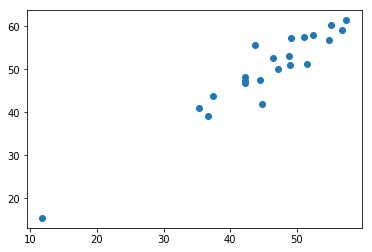

In [41]:
plt.scatter(datause1, datause2)

17


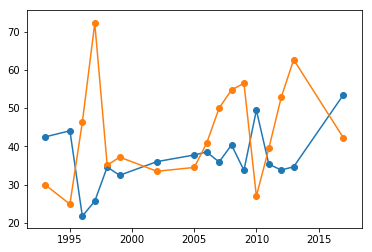

-1.2289898386728662 32 1.308572791089844 0.22803685880667435
Accept null hypothesis that the means are equal.
-0.5179818080698584
0.033181004643763466


In [22]:
# datause1 = interannual_grouped_003_w['variable003']
# datause2 = interannual_grouped_003_x['variable003']

# dataone = interannual_grouped_003_w
# datatwo = interannual_grouped_003_x

result = pd.merge(dataone, datatwo, on="year", how="inner")
print(len(result))

plt.plot(result.index, result['variable003_y'])
plt.scatter(result.index, result['variable003_y'])


plt.plot(result.index, result['variable003_x'])
plt.scatter(result.index, result['variable003_x'])
plt.show()


from math import * ; from numpy import *; from scipy import *
from scipy import stats

# calculate means
data1 = datause1; data2 = datause2
mean1, mean2 = mean(data1), mean(data2)

# calculate sample standard deviations
std1, std2 = std(data1, ddof=1), std(data2, ddof=1)

# calculate standard errors
n1, n2 = len(data1), len(data2)
se1, se2 = std1/sqrt(n1), std2/sqrt(n2)

# standard error on the difference between the samples
sed = sqrt(se1**2.0 + se2**2.0)

# calculate the t statistic
t_stat = (mean1 - mean2) / sed

# degrees of freedom
df = n1 + n2 - 2

# calculate the critical value
alpha = 0.10
cv = stats.t.ppf(1.0 - alpha, df)

# calculate the p-value
p = (1 - stats.t.cdf(abs(t_stat), df)) * 2

print(t_stat, df, cv, p)

if p > alpha:
    print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

    
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(result['variable003_x'], result['variable003_y'])
print(r_value)
print(p_value)

In [1658]:
print(result)

        variable003_x  variable003_y
year                                
1993.0       7.818182       7.880000
1994.0       9.250000      11.035714
1995.0      11.600000       8.777778
1996.0      16.590909       8.100000
1997.0       9.187500       7.831429
1998.0       8.047619       9.160000
1999.0       9.047619       9.454545
2000.0      11.428571      10.826087
2001.0      11.240000       8.687500
2002.0       9.653846      10.142857
2003.0       9.111111       8.500000
2004.0       8.142857       9.952381
2005.0      10.400000       9.291667
2006.0      10.411765       9.800000
2007.0       9.775000       9.172414
2008.0       9.310345       8.944444
2009.0       9.428571       8.833333
2010.0       9.500000       9.297297
2011.0      12.500000      11.230769
2012.0       8.400000       7.466667
2013.0      12.181818      10.083333
2014.0      13.000000       8.400000
2015.0      10.625000      12.000000
2016.0      10.380952       9.300000
2017.0      10.454545       8.636364
2

In [1636]:
print(np.nanmean(interannual_grouped_003_t))

73.4185090024795


In [1504]:
print(np.nanmin(pandas_v_drop['gmld']))

6.8666648864746085


In [ ]:
winter_list_reindex
spring_list_reindex
summer_list_reindex
fall_list_reindex

In [1507]:
print(winter_list_reindex)

      index  Unnamed: 0  glorys_lat_index  glorys_lon_index  bottomdepth  \
0         0         0.0                71                88           53   
1         1         1.0                72                92           40   
2         2         2.0                73                96           25   
3         3         3.0                71                94           24   
4         4         4.0                71                96           22   
...     ...         ...               ...               ...          ...   
4354   3096      3061.0                83               115          210   
4355   3097      3063.0                87               100          247   
4356   3098      3064.0                87               100          248   
4357   3099      3066.0                90               100          260   
4358   3100      3067.0                88                93           37   

      003densmld  glorys_mld    obs_lat  obs_lon_y  date  year  glorys_lat  \
0        

In [1530]:
df_winterna = winter_list_reindex.dropna(subset=['glorys_mld'], how='all')
df_winter = df_winterna[(winter_list_reindex['glorys_mld'] <= 11)]
print(len(df_winterna))
print(len(df_winter))
print('---')
df_springna = spring_list_reindex.dropna(subset=['glorys_mld'], how='all')
df_spring = df_springna[(spring_list_reindex['glorys_mld'] <= 11)]
print(len(df_springna))
print(len(df_spring))
print('---')
df_summerna = summer_list_reindex.dropna(subset=['glorys_mld'], how='all')
df_summer = df_summerna[(summer_list_reindex['glorys_mld'] <= 11)]
print(len(df_summerna))
print(len(df_summer))
print('---')
df_fallna = fall_list_reindex.dropna(subset=['glorys_mld'], how='all')
df_fall = df_fallna[(fall_list_reindex['glorys_mld'] <= 11)]
print(len(df_fallna))
print(len(df_fall))

4359
407
---
12543
7384
---
8762
8490
---
10706
3004


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [1527]:
df_winterna = winter_list_reindex.dropna(subset=['glorysmld_new001'], how='all')
df_winter = df_winterna[(winter_list_reindex['glorysmld_new001'] < 11)]
print(4359-len(df_winterna))
print(len(df_winter))
print(((4359-len(df_winterna))+len(df_winter))/4359)
print('---')
df_springna = spring_list_reindex.dropna(subset=['glorysmld_new001'], how='all')
df_spring = df_springna[(spring_list_reindex['glorysmld_new001'] < 11)]
print(12543-len(df_springna))
print(len(df_spring))
print(((12543-len(df_springna))+len(df_spring))/12543)
print('---')
df_summerna = summer_list_reindex.dropna(subset=['glorysmld_new001'], how='all')
df_summer = df_summerna[(summer_list_reindex['glorysmld_new001'] < 11)]
print(8762-len(df_summerna))
print(len(df_summer))
print(((8762-len(df_summerna))+len(df_summer))/8762)
print('---')
df_fallna = fall_list_reindex.dropna(subset=['glorysmld_new001'], how='all')
df_fall = df_fallna[(fall_list_reindex['glorysmld_new001'] < 11)]
print(10706-len(df_fallna))
print(len(df_fall))
print(((10706-len(df_fallna))+len(df_fall))/10706)



301
322
0.14292268869006652
---
5991
2587
0.6838874272502591
---
7977
698
0.9900707601004337
---
2737
1602
0.4052867550906034


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [1531]:
df_winterna = winter_list_reindex.dropna(subset=['glorysmld_new003'], how='all')
df_winter = df_winterna[(winter_list_reindex['glorysmld_new003'] < 11)]
print(4359-len(df_winterna))
print(len(df_winter))
print(((4359-len(df_winterna))+len(df_winter))/4359)
print('---')
df_springna = spring_list_reindex.dropna(subset=['glorysmld_new003'], how='all')
df_spring = df_springna[(spring_list_reindex['glorysmld_new003'] < 11)]
print(12543-len(df_springna))
print(len(df_spring))
print(((12543-len(df_springna))+len(df_spring))/12543)
print('---')
df_summerna = summer_list_reindex.dropna(subset=['glorysmld_new003'], how='all')
df_summer = df_summerna[(summer_list_reindex['glorysmld_new003'] < 11)]
print(8762-len(df_summerna))
print(len(df_summer))
print(((8762-len(df_summerna))+len(df_summer))/8762)
print('---')
df_fallna = fall_list_reindex.dropna(subset=['glorysmld_new003'], how='all')
df_fall = df_fallna[(fall_list_reindex['glorysmld_new003'] < 11)]
print(10706-len(df_fallna))
print(len(df_fall))
print(((10706-len(df_fallna))+len(df_fall))/10706)



95
169
0.060564349621472814
---
3227
2580
0.46296739217093197
---
5870
2337
0.9366582971924218
---
1169
1237
0.2247337941341304


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [1511]:
np.nanmean(summer_list_reindex['glorys_mld'])
np.nanmean(fall_list_reindex['glorys_mld'])
np.nanmean(spring_list_reindex['glorys_mld'])
np.nanmean(winter_list_reindex['glorys_mld'])

36.95802891147768

In [1620]:
# df_x = pandas_x[(pandas_x['gmld'] < 10.5)]
# print(len(df_x))
# df_v = pandas_v[(pandas_v['gmld'] < 10.5)]
# print(len(df_v))
# df_y = pandas_y[(pandas_y['gmld'] < 10.5)]
# print(len(df_y))
# df_t = pandas_t[(pandas_t['gmld'] < 10.5)]
# print(len(df_t))
# df_w = pandas_w[(pandas_w['gmld'] < 10.5)]
# print(len(df_w))

In [1476]:
view = interannual_grouped_003_y_drop
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(view['variable003'], view['gmld'])
print(r_value)
print(p_value)


0.6422635846668383
0.00040395297942618204


In [1477]:
print(len(view))
print(np.nanmean(view['variable003']),'±',np.nanstd(view['variable003']))
print(np.nanmean(view['gmld']),'±',np.nanstd(view['gmld']))
print(np.nanmean(view['gmld01']),'±',np.nanstd(view['gmld01']))
print(np.nanmean(view['gmld03']),'±',np.nanstd(view['gmld03']))

26
23.083035011965084 ± 5.2590558258995665
24.10694540331273 ± 6.022129279281837
26.419828999953193 ± 6.762776211009196
29.57042693499731 ± 6.911021061688928


In [1478]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(view['gmld03'], view['gmld'])
print('x_rval: GMLD-GMLD03:',r_value)
print('x_pval: GMLD-GMLD03:',p_value)
print('')
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(view['gmld01'], view['gmld'])
print('x_rval: GMLD-GMLD01:',r_value)
print('x_pval: GMLD-GMLD01:',p_value)
print('')
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(view['variable003'], view['gmld'])
print('x_rval: obs-GMLD:',r_value)
print('x_pval: obs-GMLD:',p_value)
print('')
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(view['variable003'], view['gmld01'])
print('x_rval: obs-GMLD01:',r_value)
print('x_pval: obs-GMLD01:',p_value)
print('')
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(view['variable003'], view['gmld03'])
print('x_rval: obs-GMLD03:',r_value)
print('x_pval: obs-GMLD03:',p_value)

x_rval: GMLD-GMLD03: 0.9819098467100259
x_pval: GMLD-GMLD03: 7.394942660331413e-19

x_rval: GMLD-GMLD01: 0.9544752094860827
x_pval: GMLD-GMLD01: 4.142543268426506e-14

x_rval: obs-GMLD: 0.6422635846668383
x_pval: obs-GMLD: 0.00040395297942618204

x_rval: obs-GMLD01: 0.6147446440292273
x_pval: obs-GMLD01: 0.0008328005026004046

x_rval: obs-GMLD03: 0.6138366445353839
x_pval: obs-GMLD03: 0.0008519552085436623


In [1311]:
datause1 = interannual_grouped_003_x['variable003']
datause2 = interannual_grouped_003_w['variable003']

dataone = interannual_grouped_003_x
datatwo = interannual_grouped_003_w

result = pd.merge(dataone, datatwo, on="year", how="inner")

plt.plot(result.index, result['variable003_y'])
plt.plot(result.index, result['variable003_x'])

from math import * ; from numpy import *; from scipy import *
from scipy import stats

# calculate means
data1 = datause1; data2 = datause2
mean1, mean2 = mean(data1), mean(data2)

# calculate sample standard deviations
std1, std2 = std(data1, ddof=1), std(data2, ddof=1)

# calculate standard errors
n1, n2 = len(data1), len(data2)
se1, se2 = std1/sqrt(n1), std2/sqrt(n2)

# standard error on the difference between the samples
sed = sqrt(se1**2.0 + se2**2.0)

# calculate the t statistic
t_stat = (mean1 - mean2) / sed

# degrees of freedom
df = n1 + n2 - 2

# calculate the critical value
alpha = 0.10
cv = stats.t.ppf(1.0 - alpha, df)

# calculate the p-value
p = (1 - stats.t.cdf(abs(t_stat), df)) * 2

print(t_stat, df, cv, p)

if p > alpha:
    print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

    
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(result['variable003_x'], result['variable003_y'])
print(r_value)
print(p_value)

In [1312]:
print(np.nanmean(datause1))
print(np.nanmean(datause2))

19.20413064316496
27.134148705191613


In [1313]:
result = pd.merge(dataone, datatwo, on="year", how="inner")

In [1314]:
print(result)

        variable003_x  variable003_y
year                                
1993.0      19.466667      30.376068
1994.0      13.787234      36.787500
1995.0      22.551724      27.290323
1996.0      13.765957      23.255556
1997.0      16.326087      33.230769
1998.0      19.875000      30.500000
1999.0      20.881356      37.138889
2000.0      19.761905      23.086022
2001.0      11.701754      28.400000
2002.0      24.507937      26.382979
2003.0      12.893939      19.699248
2004.0      16.428571      29.183486
2005.0      18.206897      23.451613
2006.0      13.677966      19.128205
2007.0      15.389831      21.305882
2008.0      22.357143      21.310680
2009.0      19.818182      28.153226
2010.0      25.191176      29.220126
2011.0      16.673077      26.051546
2012.0      18.358209      28.808081
2013.0      20.666667      33.829268
2014.0      25.571429      28.200000
2015.0      20.203390      30.082474
2016.0      26.148936      31.547170
2017.0      24.636364      20.559322
2

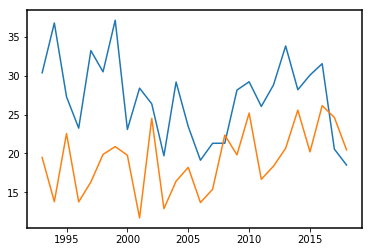

In [1315]:
plt.plot(result.index, result['variable003_y'])
plt.plot(result.index, result['variable003_x'])

In [1316]:
from math import * ; from numpy import *; from scipy import *
from scipy import stats

# calculate means
data1 = datause1; data2 = datause2
mean1, mean2 = mean(data1), mean(data2)

# calculate sample standard deviations
std1, std2 = std(data1, ddof=1), std(data2, ddof=1)

# calculate standard errors
n1, n2 = len(data1), len(data2)
se1, se2 = std1/sqrt(n1), std2/sqrt(n2)

# standard error on the difference between the samples
sed = sqrt(se1**2.0 + se2**2.0)

# calculate the t statistic
t_stat = (mean1 - mean2) / sed

# degrees of freedom
df = n1 + n2 - 2

# calculate the critical value
alpha = 0.10
cv = stats.t.ppf(1.0 - alpha, df)

# calculate the p-value
p = (1 - stats.t.cdf(abs(t_stat), df)) * 2

print(t_stat, df, cv, p)

if p > alpha:
    print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

    
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(result['variable003_x'], result['variable003_y'])
print(r_value)
print(p_value)

-6.018696004956903 50 1.2987136939791877 2.0473031914214346e-07
Reject the null hypothesis that the means are equal.
0.12193056423318235
0.552933519822217


In [1034]:
# print(len(pandasnew))
# print(np.nanmean(list(pandasnew['diff'])))
# print(np.nanstd(list(pandasnew['diff'])))

2467
7.755700325732899
13.761661033894999


In [108]:
season = fall_list_reindex #spring_list_reindex
variable = '003densmld'

lonlist_v = []; latlist_v = []; diff_v= [] 
lonlist_x = []; latlist_x = []; diff_x= [] 
lonlist_w = []; latlist_w = []; diff_w= [] 
lonlist_y = []; latlist_y = []; diff_y= [] 
lonlist_t = []; latlist_t = []; diff_t= [] 

newdf = pd.DataFrame({'lon': list(season['obs_lon']),'lat': list(season['obs_lat'])})  
for ii in range(len(season)):
    new = newdf.iloc[ii].values
    point = Point(new)
    if polygon_x.contains(point) == True and (season[variable][ii]>5) and (season['bottomdepth'][ii]<=200) and (season['02tempmld'][ii]>5): 
        diff_x.append(season['02tempmld'][ii]-season['003densmld'][ii])
        lonlist_x.append(season['obs_lon'][ii])
        latlist_x.append(season['obs_lat'][ii])
    if polygon_v.contains(point) == True and (season[variable][ii]>5) and (season['bottomdepth'][ii]<=200) and (season['02tempmld'][ii]>5): #and (season['bottomdepth'][ii]<=200) 
        diff_v.append(season['02tempmld'][ii]-season['003densmld'][ii])
        lonlist_v.append(season['obs_lon'][ii])
        latlist_v.append(season['obs_lat'][ii])
    if polygon_w.contains(point) == True and (season[variable][ii]>5) and (season['02tempmld'][ii]>5): #and (season['bottomdepth'][ii]<=200) 
        diff_w.append(season['02tempmld'][ii]-season['003densmld'][ii])
        lonlist_w.append(season['obs_lon'][ii])
        latlist_w.append(season['obs_lat'][ii])
    if polygon_t.contains(point) == True and (season[variable][ii]>5) and (season['02tempmld'][ii]>5): #and (season['bottomdepth'][ii]<=200) 
        diff_t.append(season['02tempmld'][ii]-season['003densmld'][ii])
        lonlist_t.append(season['obs_lon'][ii])
        latlist_t.append(season['obs_lat'][ii])
    if polygon_y.contains(point) == True and (season[variable][ii]>5) and (season['02tempmld'][ii]>5): #and (season['bottomdepth'][ii]<=200) 
        diff_y.append(season['02tempmld'][ii]-season['003densmld'][ii])
        lonlist_y.append(season['obs_lon'][ii])
        latlist_y.append(season['obs_lat'][ii])
        
pandasnew_x = pd.DataFrame({'diff': diff_x, 'lon':lonlist_x, 'lat':latlist_x})
pandasnew_v = pd.DataFrame({'diff': diff_v, 'lon':lonlist_v, 'lat':latlist_v})
pandasnew_w = pd.DataFrame({'diff': diff_w, 'lon':lonlist_w, 'lat':latlist_w})
pandasnew_y = pd.DataFrame({'diff': diff_y, 'lon':lonlist_y, 'lat':latlist_y})
pandasnew_t = pd.DataFrame({'diff': diff_t, 'lon':lonlist_t, 'lat':latlist_t})

In [109]:
print(len(pandasnew_v))

1842


In [110]:
mean_t = np.nanmean(pandasnew_t['diff'])
std_t = 2*np.nanstd(pandasnew_t['diff'])
print(mean_t, std_t)

mean_y = np.nanmean(pandasnew_y['diff'])
std_y = 2*np.nanstd(pandasnew_y['diff'])
print(mean_y, std_y)

mean_w = np.nanmean(pandasnew_w['diff'])
std_w = 2*np.nanstd(pandasnew_w['diff'])
print(mean_w, std_w)

mean_x = np.nanmean(pandasnew_x['diff'])
std_x = 2*np.nanstd(pandasnew_x['diff'])
print(mean_x, std_x)

mean_v = np.nanmean(pandasnew_v['diff'])
std_v = 2*np.nanstd(pandasnew_v['diff'])
print(mean_v, std_v)

7.355781448538755 26.640726802769493
9.147420147420148 31.416854080352945
4.575450945886494 21.608984059956203
3.2708039492242595 14.117581121050588
3.8441910966340935 12.618367499795687


In [66]:
largeones_x = []; lat_x = []; lon_x = []; neglargeones_x = []; neglat_x = []; neglon_x = []
largeones_v = []; lat_v = []; lon_v = []; neglargeones_v = []; neglat_v = []; neglon_v = []
largeones_w = []; lat_w = []; lon_w = []; neglargeones_w = []; neglat_w = []; neglon_w = []
largeones_y = []; lat_y = []; lon_y = []; neglargeones_y = []; neglat_y = []; neglon_y = []
largeones_t = []; lat_t = []; lon_t = []; neglargeones_t = []; neglat_t = []; neglon_t = []

for i in range(len(pandasnew_x)):
    mean = np.nanmean(pandasnew_x['diff'])
    if pandasnew_x['diff'][i] > 0 + 1*std_x: #(mean+20)
        largeones_x.append(pandasnew_x['diff'][i])
        lat_x.append(pandasnew_x['lat'][i])
        lon_x.append(pandasnew_x['lon'][i]*-1)
    elif pandasnew_x['diff'][i] < 0 - 1*std_x:
        neglargeones_x.append(pandasnew_x['diff'][i])
        neglat_x.append(pandasnew_x['lat'][i])
        neglon_x.append(pandasnew_x['lon'][i]*-1)
print(mean)

for i in range(len(pandasnew_v)):
    mean = np.nanmean(pandasnew_v['diff'])
    if pandasnew_v['diff'][i] > 0 + 1*std_v:
        largeones_v.append(pandasnew_v['diff'][i])
        lat_v.append(pandasnew_v['lat'][i])
        lon_v.append(pandasnew_v['lon'][i]*-1)
    elif pandasnew_v['diff'][i] < 0 - 1*std_v:
        neglargeones_v.append(pandasnew_v['diff'][i])
        neglat_v.append(pandasnew_v['lat'][i])
        neglon_v.append(pandasnew_v['lon'][i]*-1)
print(mean)

for i in range(len(pandasnew_w)):
    mean = np.nanmean(pandasnew_w['diff'])
    if pandasnew_w['diff'][i] > 0 + 1*std_w:
        largeones_w.append(pandasnew_w['diff'][i])
        lat_w.append(pandasnew_w['lat'][i])
        lon_w.append(pandasnew_w['lon'][i]*-1)
    elif pandasnew_w['diff'][i] < 0 - 1*std_w:
        neglargeones_w.append(pandasnew_w['diff'][i])
        neglat_w.append(pandasnew_w['lat'][i])
        neglon_w.append(pandasnew_w['lon'][i]*-1)
print(mean)

for i in range(len(pandasnew_y)):
    mean = np.nanmean(pandasnew_y['diff'])
    if pandasnew_y['diff'][i] > 0 + 1*std_y:
        largeones_y.append(pandasnew_y['diff'][i])
        lat_y.append(pandasnew_y['lat'][i])
        lon_y.append(pandasnew_y['lon'][i]*-1)
    elif pandasnew_y['diff'][i] < 0 - 1*std_y:
        neglargeones_y.append(pandasnew_y['diff'][i])
        neglat_y.append(pandasnew_y['lat'][i])
        neglon_y.append(pandasnew_y['lon'][i]*-1)
print(mean)  

for i in range(len(pandasnew_t)):
    mean = np.nanmean(pandasnew_t['diff'])
    if pandasnew_t['diff'][i] > 0 + 1*std_t:
        largeones_t.append(pandasnew_t['diff'][i])
        lat_t.append(pandasnew_t['lat'][i])
        lon_t.append(pandasnew_t['lon'][i]*-1)
    elif pandasnew_t['diff'][i] < 0 - 1*std_t:
        neglargeones_t.append(pandasnew_t['diff'][i])
        neglat_t.append(pandasnew_t['lat'][i])
        neglon_t.append(pandasnew_t['lon'][i]*-1)
print(mean)  

2.1011673151750974
1.7553889409559513
4.3642346208869816
5.9402234636871505
8.088837209302325


In [111]:
largeones_x = []; lat_x = []; lon_x = []; neglargeones_x = []; neglat_x = []; neglon_x = []
largeones_v = []; lat_v = []; lon_v = []; neglargeones_v = []; neglat_v = []; neglon_v = []
largeones_w = []; lat_w = []; lon_w = []; neglargeones_w = []; neglat_w = []; neglon_w = []
largeones_y = []; lat_y = []; lon_y = []; neglargeones_y = []; neglat_y = []; neglon_y = []
largeones_t = []; lat_t = []; lon_t = []; neglargeones_t = []; neglat_t = []; neglon_t = []

for i in range(len(pandasnew_x)):
    mean = np.nanmean(pandasnew_x['diff'])
    if (pandasnew_x['diff'][i] > 0 + 1*std_x) or (pandasnew_x['diff'][i] < 0 - 1*std_x): #(mean+20)
        largeones_x.append(pandasnew_x['diff'][i])
        lat_x.append(pandasnew_x['lat'][i])
        lon_x.append(pandasnew_x['lon'][i]*-1)
print(mean)

for i in range(len(pandasnew_v)):
    mean = np.nanmean(pandasnew_v['diff'])
    if (pandasnew_v['diff'][i] > 0 + 1*std_v) or (pandasnew_v['diff'][i] < 0 - 1*std_v):
        largeones_v.append(pandasnew_v['diff'][i])
        lat_v.append(pandasnew_v['lat'][i])
        lon_v.append(pandasnew_v['lon'][i]*-1)
print(mean)

for i in range(len(pandasnew_w)):
    mean = np.nanmean(pandasnew_w['diff'])
    if (pandasnew_w['diff'][i] > 0 + 1*std_w) or (pandasnew_w['diff'][i] < 0 - 1*std_w):
        largeones_w.append(pandasnew_w['diff'][i])
        lat_w.append(pandasnew_w['lat'][i])
        lon_w.append(pandasnew_w['lon'][i]*-1)
print(mean)

for i in range(len(pandasnew_y)):
    mean = np.nanmean(pandasnew_y['diff'])
    if (pandasnew_y['diff'][i] > 0 + 1*std_y) or (pandasnew_y['diff'][i] < 0 - 1*std_y):
        largeones_y.append(pandasnew_y['diff'][i])
        lat_y.append(pandasnew_y['lat'][i])
        lon_y.append(pandasnew_y['lon'][i]*-1)
print(mean)  

for i in range(len(pandasnew_t)):
    mean = np.nanmean(pandasnew_t['diff'])
    if (pandasnew_t['diff'][i] > 0 + 1*std_t) or (pandasnew_t['diff'][i] < 0 - 1*std_t):
        largeones_t.append(pandasnew_t['diff'][i])
        lat_t.append(pandasnew_t['lat'][i])
        lon_t.append(pandasnew_t['lon'][i]*-1)
print(mean)  

3.2708039492242595
3.8441910966340935
4.575450945886494
9.147420147420148
7.355781448538755


In [112]:
# neglon_x = neglon; neglat_x = neglat; lon_x = lon; lat_x = lat #done
# neglon_v = neglon; neglat_v = neglat; lon_v = lon; lat_v = lat #done
# neglon_w = neglon; neglat_w = neglat; lon_w = lon; lat_w = lat #done
# neglon_y = neglon; neglat_y = neglat; lon_y = lon; lat_y = lat #done
# neglon_t = neglon; neglat_t = neglat; lon_t = lon; lat_t = lat #done

In [113]:
print(len(neglon_x))
print(len(lon_x))

0
98


In [114]:
print(np.nanmax(largeones_t))
print(np.nanmax(largeones_y))
print(np.nanmax(largeones_w))
print(np.nanmax(largeones_v))
print(np.nanmax(largeones_x))

print(np.nanmin(largeones_t))
print(np.nanmin(largeones_y))
print(np.nanmin(largeones_w))
print(np.nanmin(largeones_v))
print(np.nanmin(largeones_x))





112.0
123.0
88.0
45.0
49.0
27.0
-35.0
-61.0
-34.0
-47.0


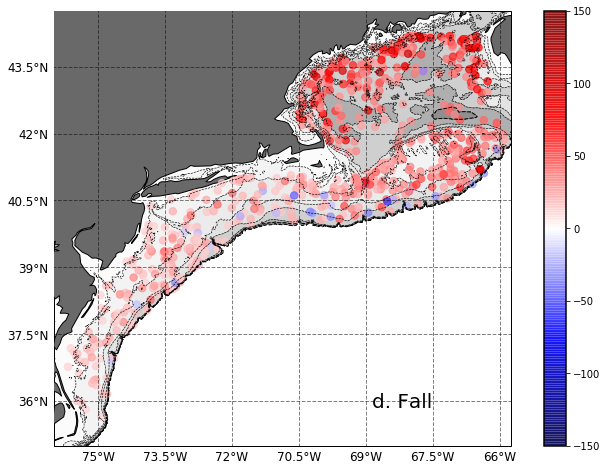

In [115]:
from matplotlib.pyplot import * ; import cartopy.feature as cfeature

plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-76.00, -65.75, 35, 44.75], ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=1, color='black', alpha=0.5, linestyle='--', zorder = 20)
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 12, 'color': 'black'}
gl.ylabel_style = {'size': 12, 'color': 'black'}

plt.text(-68.85, 35.85, 'd. Fall', dict(size=20))

ax.contour(lonNC, latNC, depthNC, [-400,-300],linewidths=1,colors='black', alpha = 1,zorder=20) #alpha = 0.7
ax.contour(lonNC, latNC, depthNC, [-200,-100],linewidths=0.6,colors='black', alpha = 1,zorder=20) #alpha = 0.7
ax.contour(lonNC, latNC, depthNC, [-75,-50,-25],linewidths=0.6,colors='black',zorder=20)
cf = plt.contourf(lonNC,latNC,depthNC, [-400,-300,-200,-100,-75,-50,-25,0], cmap = 'gray',alpha=0.5)

plt.scatter(lon_x, lat_x, c=largeones_x,s=55,alpha = 0.7,zorder=15, cmap = 'seismic', vmin = -150, vmax = 150)
plt.scatter(lon_v, lat_v, c=largeones_v,s=55,alpha = 0.7,zorder=15, cmap = 'seismic', vmin = -150, vmax = 150)
plt.scatter(lon_w, lat_w, c=largeones_w,s=55,alpha = 0.7,zorder=15, cmap = 'seismic', vmin = -150, vmax = 150)
plt.scatter(lon_y, lat_y, c=largeones_y,s=55,alpha = 0.7,zorder=15, cmap = 'seismic', vmin = -150, vmax = 150)
plt.scatter(lon_t, lat_t, c=largeones_t,s=55,alpha = 0.7,zorder=15, cmap = 'seismic', vmin = -150, vmax = 150)

feature = cfeature.NaturalEarthFeature(name='coastline', category='physical',scale='50m',edgecolor='black', facecolor='dimgray')
ax.add_feature(feature,zorder=10)
plt.colorbar()

plt.savefig('fall_diff')

plt.show()

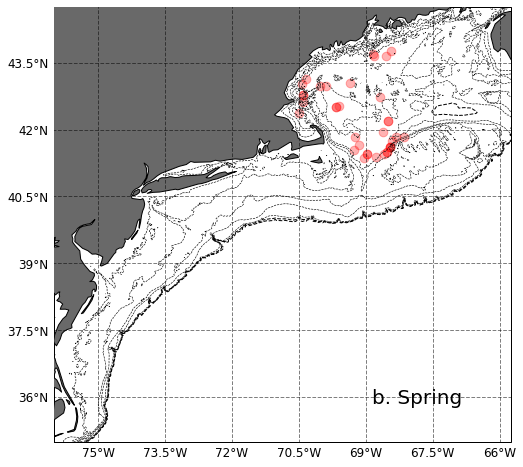

In [76]:
from matplotlib.pyplot import * ; import cartopy.feature as cfeature

plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-76.00, -65.75, 35, 44.75], ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=1, color='black', alpha=0.5, linestyle='--', zorder = 20)
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 12, 'color': 'black'}
gl.ylabel_style = {'size': 12, 'color': 'black'}

plt.text(-68.85, 35.85, 'b. Spring', dict(size=20))

# plt.text(-68.85, 35.85, 'Winter', dict(size=30))
# cmap=plt.cm.get_cmap('Blues', 150)
# cf = plt.contourf(xi,yi,d, np.arange(0, 1.02,0.01), cmap = cmap)

# plt.scatter(neglon_x, neglat_x, c='royalblue',s=75,alpha = 0.3,zorder=15)
# plt.scatter(lon_x, lat_x, c='red',s=75,alpha = 0.3,zorder=15)
# plt.scatter(neglon_v, neglat_v, c='royalblue',s=75,alpha = 0.3,zorder=15)
# plt.scatter(lon_v, lat_v, c='red',s=75,alpha = 0.3,zorder=15)
# plt.scatter(neglon_w, neglat_w, c='royalblue',s=75,alpha = 0.3,zorder=15)
# plt.scatter(lon_w, lat_w, c='red',s=75,alpha = 0.3,zorder=15)
# plt.scatter(neglon_y, neglat_y, c='royalblue',s=75,alpha = 0.3,zorder=15)
# plt.scatter(lon_y, lat_y, c='red',s=75,alpha = 0.3,zorder=15)
# plt.scatter(neglon_t, neglat_t, c='royalblue',s=75,alpha = 0.3,zorder=15)
plt.scatter(lon_t, lat_t, c='red',s=75,alpha = 0.3,zorder=15)

# plt.scatter(flat_largediffobs_lonfull, flat_largediffobs_latfull, s=75,alpha = 0.1,zorder=15)
# c = new['flat_largediffobs_full'],cmap='ocean_r',zorder=15
ax.contour(lonNC, latNC, depthNC, [-400,-300], linewidths=1,colors='black', alpha = 1,zorder=20) #alpha = 0.7
ax.contour(lonNC, latNC, depthNC, [-200,-100], linewidths=0.6,colors='black', alpha = 1,zorder=20) #alpha = 0.7
ax.contour(lonNC, latNC, depthNC, [-75,-50,-25], linewidths=0.6,colors='black',zorder=20)

feature = cfeature.NaturalEarthFeature(name='coastline', category='physical',scale='50m',edgecolor='black', facecolor='dimgray')
ax.add_feature(feature,zorder=10)
# cbar = plt.colorbar(cf, orientation='vertical')
# cbar.ax.set_xticklabels([-100,-75,-50,-25,0,25,50,75,100])

#ticks=[-100,-75,-50,-25,0,25,50,75,100]

# cbar = plt.colorbar(cf, ticks=[-80,-60,-40,-20,0,20,40,60,80], orientation='vertical')
# cbar.ax.set_xticklabels([0,20,40,60,80,100])
# # # cbar = plt.colorbar(cf, ax=ax)
# cbar.ax.get_yaxis().labelpad = 20

# cbar.ax.set_ylabel('MLD (m)', rotation=270, fontsize = 15)
# cbar.set_ticks([0,10,20,30,40,50,60,70,80,90,100])
# cbar.ax.tick_params(labelsize=12)

# plt.savefig('fall_scat_regionalmean_2stdfrom0')

plt.show()

In [737]:
data1 = interannual_grouped_003['variable003']; data2 = list(interannual_grouped_003.index)

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(data2, data1)
print(slope)
print(r_value)
print(p_value)
print(len(interannual_grouped_003))
x = data2
listnow = []
for i in range(len(x)): 
    a = (slope*x[i] + intercept)
    listnow.append(a)
print(len(listnow))

-0.2056301034331026
-0.3180404250225774
0.11333780803538711
26
26


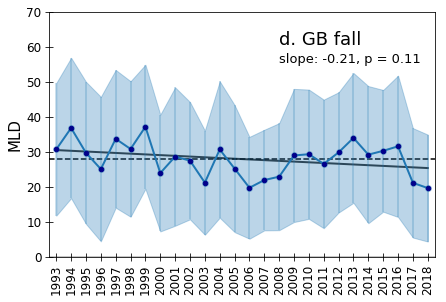

In [739]:
plt.ylim(0,70)
x = list(interannual_grouped_003.index)
y = interannual_grouped_003['variable003']
color = 'tab:blue'
color2 = 'darkblue'

plt.xlim(1992.5,2018.5)

plt.plot(x, y, linestyle='-', color=color, linewidth=2,alpha = 1, zorder= 30)
plt.errorbar(x,y, interannual_grouped_003std['variable003'],linestyle='None', marker='o',color=color,alpha= 0.3, markersize=6, zorder = 30)
plt.fill_between(x, np.asarray(y) - np.asarray(interannual_grouped_003std['variable003']), np.asarray(y) + np.asarray(interannual_grouped_003std['variable003']),color = color, alpha = 0.3,zorder = 30)
plt.scatter(x, y,color=color2,s=20, alpha = 1, zorder = 60)
plt.yticks([0,10,20,30,40,50,60,70], fontsize = 12) 
# plt.yticks([-10,-5,0,5,10,15,20,25,30], fontsize = 12) 


plt.xticks([1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018], fontsize = 12,rotation=90, color='black') 
plt.tick_params(axis="y", direction='inout',length=8)
plt.tick_params(axis="x", direction='inout',length=8)
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.3)
plt.axhline(y=np.nanmean(y), color='black', linestyle='--',alpha = 1)
plt.ylabel('MLD',fontsize=15)
plt.tight_layout(pad=0, w_pad=0,h_pad = 0)
plt.text(2008, 60.5, 'd. GB fall', dict(size=18),zorder=100)
plt.text(2008, 55.5, 'slope: -0.21, p = 0.11', dict(size=13),zorder=100)
# plt.text(2011, 60.5, 'p-value: 0.07', dict(size=13),zorder=100)

plt.plot(x, listnow, color='black',linewidth=2, alpha=0.8)
plt.savefig('GBfall')
plt.show()

In [522]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

rmse_val = rmse(np.array(data1), np.array(data2))
print("rms error is: " + str(rmse_val))

rms error is: 1965.8618649505777


In [432]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

pandasnew = pandas.dropna()
rmse_val = rmse(np.array(pandasnew['variable003']), np.array(pandasnew['variable02']))
print("rms error is: " + str(rmse_val))


rms error is: 15.210012404968282


In [413]:
distance = []

for i in range(len(interannual_grouped_003)): #season
    temp = data2#season['variablelist_02'][i]
    dens = data1#season['variable003'][i]
    Euclideandistance = abs(temp - dens) / math.sqrt(2)
    distance.append(Euclideandistance)
print(np.nanstd(distance))
print(np.nanmean(distance))
summed = np.sum(distance)*np.sum(distance)
print(summed)
RMSE = summed/len(distance)
print(RMSE)
print(math.sqrt(RMSE))

In [394]:
greaterthan10 = []; lessthan10 = []; lessthan0 = []; zerolist = []
for i in range(len(diff)):
    if diff[i] > 10:
        greaterthan10.append(1)
    elif diff[i] == 0:
        zerolist.append(1)
    elif diff[i] > 0 and diff[i] <= 10:
        lessthan10.append(1)
    elif diff[i] < 0:
        lessthan0.append(1)
print(len(greaterthan10), 100*(len(greaterthan10)/len(variablelist_003)))
print(len(lessthan10), 100*(len(lessthan10)/len(variablelist_003)))
print(len(lessthan0), 100*(len(lessthan0)/len(variablelist_003)))
print(len(zerolist), 100*(len(zerolist)/len(variablelist_003)))



1442 15.612819402338673
4931 53.38891294932871
495 5.35946297098311
2260 24.469467301862277


In [395]:
print(np.nanmean(diff))
print(np.nanmax(diff))
print(np.nanmin(diff))

print(np.nanstd(diff))

5.5455740578439965
123.0
-61.0
11.316695574605761


In [271]:
pandas.year.unique()


array([1993., 1994., 1995., 1996., 1997., 1998., 1999., 2000., 2001.,
       2002., 2003., 2004., 2005., 2006., 2007., 2008., 2009., 2010.,
       2011., 2012., 2013., 2014., 2015., 2016., 2018., 2017.])

In [272]:
# summer and fall
pandas1993 = pandas[pandas['year'] == 1993]
pandas1994 = pandas[pandas['year'] == 1994]
pandas1995 = pandas[pandas['year'] == 1995]
pandas1996 = pandas[pandas['year'] == 1996]
pandas1997 = pandas[pandas['year'] == 1997]
pandas1998 = pandas[pandas['year'] == 1998]
pandas1999 = pandas[pandas['year'] == 1999]
pandas2000 = pandas[pandas['year'] == 2000]
pandas2001 = pandas[pandas['year'] == 2001]
pandas2002 = pandas[pandas['year'] == 2002]
pandas2003 = pandas[pandas['year'] == 2003]
pandas2004 = pandas[pandas['year'] == 2004]
pandas2005 = pandas[pandas['year'] == 2005]
pandas2006 = pandas[pandas['year'] == 2006]
pandas2007 = pandas[pandas['year'] == 2007]
pandas2008 = pandas[pandas['year'] == 2008]
pandas2009 = pandas[pandas['year'] == 2009]
pandas2010 = pandas[pandas['year'] == 2010]
pandas2011 = pandas[pandas['year'] == 2011]
pandas2012 = pandas[pandas['year'] == 2012]
pandas2013 = pandas[pandas['year'] == 2013]
pandas2014 = pandas[pandas['year'] == 2014]
pandas2015 = pandas[pandas['year'] == 2015]
pandas2017 = pandas[pandas['year'] == 2017]
pandas2018 = pandas[pandas['year'] == 2018]
pandas2016 = pandas[pandas['year'] == 2016]

pandas_list = [pandas1993, pandas1994, pandas1995, pandas1996, pandas1997, pandas1998,
              pandas1998, pandas2000, pandas2001, pandas2002, pandas2003, pandas2004, 
              pandas2005, pandas2006, pandas2007, pandas2008, pandas2009, pandas2010, 
              pandas2011, pandas2012, pandas2013, pandas2014, pandas2015, pandas2016,
              pandas2017, pandas2018]
print(len(pandas_list))

26


In [273]:
# #spring
# pandas1993 = pandas[pandas['year'] == 1993]
# pandas1994 = pandas[pandas['year'] == 1994]
# pandas1995 = pandas[pandas['year'] == 1995]
# pandas1996 = pandas[pandas['year'] == 1996]
# pandas1997 = pandas[pandas['year'] == 1997]
# pandas1998 = pandas[pandas['year'] == 1998]
# pandas1999 = pandas[pandas['year'] == 1999]
# pandas2000 = pandas[pandas['year'] == 2000]
# pandas2001 = pandas[pandas['year'] == 2001]
# pandas2002 = pandas[pandas['year'] == 2002]
# pandas2003 = pandas[pandas['year'] == 2003]
# pandas2004 = pandas[pandas['year'] == 2004]
# pandas2005 = pandas[pandas['year'] == 2005]
# pandas2006 = pandas[pandas['year'] == 2006]
# pandas2007 = pandas[pandas['year'] == 2007]
# pandas2008 = pandas[pandas['year'] == 2008]
# pandas2009 = pandas[pandas['year'] == 2009]
# pandas2010 = pandas[pandas['year'] == 2010]
# pandas2011 = pandas[pandas['year'] == 2011]
# pandas2012 = pandas[pandas['year'] == 2012]
# pandas2013 = pandas[pandas['year'] == 2013]
# pandas2014 = pandas[pandas['year'] == 2014]
# pandas2015 = pandas[pandas['year'] == 2015]
# pandas2017 = pandas[pandas['year'] == 2017]
# pandas2018 = pandas[pandas['year'] == 2018]
# pandas2016 = pandas[pandas['year'] == 2016]

# pandas_list = [pandas1993, pandas1994, pandas1995, pandas1996, pandas1997, pandas1998,
#               pandas1998, pandas2000, pandas2001, pandas2002, pandas2003, pandas2004, 
#               pandas2005, pandas2006, pandas2007, pandas2008, pandas2009, pandas2010, 
#               pandas2011, pandas2012, pandas2013, pandas2014, pandas2015, pandas2016,
#               pandas2017, pandas2018]
# print(len(pandas_list))

In [274]:
#winter
# pandas1993 = pandas[pandas['year'] == 1993]
# pandas1994 = pandas[pandas['year'] == 1994]
# pandas2010 = pandas[pandas['year'] == 2010]
# pandas2011 = pandas[pandas['year'] == 2011]
# pandas1995 = pandas[pandas['year'] == 1995]
# pandas1996 = pandas[pandas['year'] == 1996]
# pandas1997 = pandas[pandas['year'] == 1997]
# pandas1998 = pandas[pandas['year'] == 1998]
# pandas1999 = pandas[pandas['year'] == 1999]
# pandas2001 = pandas[pandas['year'] == 2001]
# pandas2002 = pandas[pandas['year'] == 2002]
# pandas2003 = pandas[pandas['year'] == 2003]
# pandas2004 = pandas[pandas['year'] == 2004]
# pandas2005 = pandas[pandas['year'] == 2005]
# pandas2006 = pandas[pandas['year'] == 2006]
# pandas2007 = pandas[pandas['year'] == 2007]
# pandas2008 = pandas[pandas['year'] == 2008]
# pandas2009 = pandas[pandas['year'] == 2009]
# pandas2012 = pandas[pandas['year'] == 2012]
# pandas2000 = pandas[pandas['year'] == 2000]
# pandas2013 = pandas[pandas['year'] == 2013]
# pandas2017 = pandas[pandas['year'] == 2017]

# pandas_list = [pandas1993, pandas1994, pandas2010, pandas2011, pandas1995, pandas1996,
#               pandas1997, pandas1998, pandas1999, pandas2001, pandas2002, pandas2003, 
#               pandas2004, pandas2005, pandas2006, pandas2007, pandas2008, pandas2009, 
#               pandas2012, pandas2000, pandas2013, pandas2017]
# print(len(pandas_list))

In [325]:
from scipy.interpolate import griddata

In [326]:
import numpy as np
from matplotlib.path import Path

nx = np.arange(-76,-65,0.5)
ny = np.arange(35,46,0.5)

poly_verts_w = df_w_plottable.values 
poly_verts_v = df_v_plottable.values 
poly_verts_x = df_x_plottable.values 
poly_verts_y = df_y_plottable.values 
poly_verts_t = df_t_plottable.values 

full_pandas = df_w_plottable.append(df_v_plottable)
full_pandas = full_pandas.append(df_x_plottable)
full_pandas = full_pandas.append(df_y_plottable)
full_pandas = full_pandas.append(df_t_plottable)
poly_verts_full = full_pandas.values

newlon = [-69.5,-68,-67.5, -67, -66.5, -66, -65.7, -66,-66, -66.5, -67,
         -68, -69, -70,-70.5, -70.5,-69.5, -72, -74, -74.25, -76, -75.5, -75, -74.75, -74.5, -72, -71.4, -69.5]
newlat = [40,40.3,40.4, 40.6, 40.8, 41.45, 41.8, 42.1, 43, 44.2, 44.2, 44.2, 43.9, 43.7,
         43, 42.2, 41, 41, 40.5, 39.4, 37, 36, 35.5, 36, 37.4, 39.5, 40, 40]
newpath = list(zip(newlon,newlat))
newpd = pd.DataFrame(newpath, columns=['lon','lat'])
path_new = Path(newpath)

x, y = np.meshgrid(nx, ny)
x, y = x.flatten(), y.flatten()

points = np.vstack((x,y)).T

path_w = Path(poly_verts_w)
path_v = Path(poly_verts_v)
path_x = Path(poly_verts_x)
path_y = Path(poly_verts_y)
path_t = Path(poly_verts_t)
path_full = Path(poly_verts_full)

grid = path_new.contains_points(points) 
grid = grid.reshape((22,22))

In [327]:
zi_listofarrays = []
for i in range(len(pandas_list)):
    x = pandas_list[i]['lon']*-1
    y = pandas_list[i]['lat']
    z = (pandas_list[i]['variable'])/(pandas_list[i]['bottomdepth']) #temp_slope
#     z = (pandas_list[i]['variable'])

    xi = np.arange(-76,-65,0.5)
    yi = np.arange(35,46,0.5)

    xi,yi = np.meshgrid(xi,yi)

    zi = griddata((x,y),z,(xi,yi),method='linear')
    # ci = griddata((x,y),c,(xi,yi),method='linear')

    zi = zi.reshape((22,22)) ###
    zi_listofarrays.append(zi)

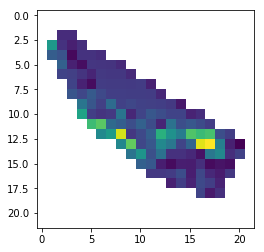

In [328]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(zi_listofarrays[22])

In [329]:
# spring and summer
newmeangridnew = np.nanmean([zi_listofarrays[0],zi_listofarrays[1],zi_listofarrays[2],zi_listofarrays[3],zi_listofarrays[4],
                          zi_listofarrays[5],zi_listofarrays[6],zi_listofarrays[7],zi_listofarrays[8],
                          zi_listofarrays[9],zi_listofarrays[10],zi_listofarrays[11],
                          zi_listofarrays[12],zi_listofarrays[13],zi_listofarrays[14],
                          zi_listofarrays[15],zi_listofarrays[16],zi_listofarrays[17],
                          zi_listofarrays[18],zi_listofarrays[19],zi_listofarrays[20],
                          zi_listofarrays[21],zi_listofarrays[22],zi_listofarrays[23],
                            zi_listofarrays[24],zi_listofarrays[25]],axis = 0)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


In [330]:
# winter
# newmeangridnew = np.nanmean([zi_listofarrays[0],zi_listofarrays[1],zi_listofarrays[2],zi_listofarrays[3],zi_listofarrays[4],
#                           zi_listofarrays[5],zi_listofarrays[6],zi_listofarrays[7],zi_listofarrays[8],
#                           zi_listofarrays[9],zi_listofarrays[10],zi_listofarrays[11],
#                           zi_listofarrays[12],zi_listofarrays[13],zi_listofarrays[14],
#                           zi_listofarrays[15],zi_listofarrays[16],zi_listofarrays[17],
#                           zi_listofarrays[18],zi_listofarrays[19],zi_listofarrays[20],
#                           zi_listofarrays[21]],axis = 0)

In [331]:
griddednewlate = np.where(grid == True, newmeangridnew, grid)

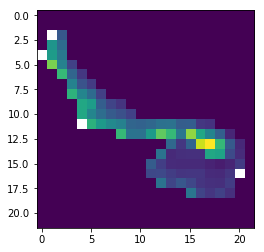

In [332]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(griddednewlate)

In [333]:
griddednewlatelate_full = np.where(griddednewlate == np.nan, 0.0, griddednewlate)

In [334]:
d = np.where(np.isnan(griddednewlatelate_full), 0, griddednewlatelate_full) # SPRING

In [335]:
print(np.nanmean(d))
print(np.nanmax(d))
print(np.nanmin(d))

0.06722193972028598
0.960293201845674
0.0


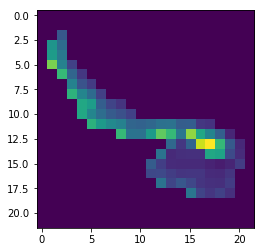

In [336]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(d)

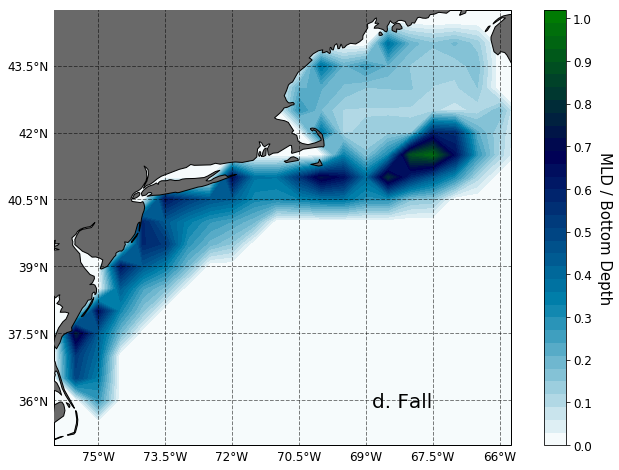

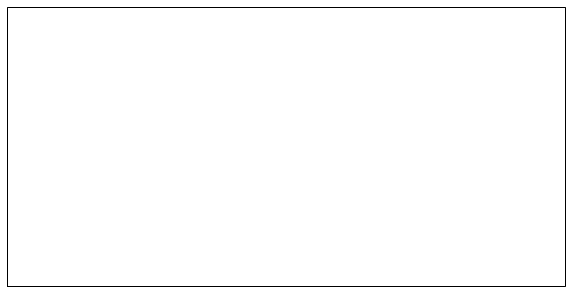

In [339]:
from matplotlib.pyplot import * ; import cartopy.feature as cfeature

plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-76.00, -65.75, 35, 44.75], ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=1, color='black', alpha=0.5, linestyle='--', zorder = 20)
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 12, 'color': 'black'}
gl.ylabel_style = {'size': 12, 'color': 'black'}

plt.text(-68.85, 35.85, 'd. Fall', dict(size=20))

# gl.xlabel_style = {'color': 'red', 'weight': 'bold'}

# cf = plt.contourf(xi,yi,d,np.arange(0, 92,0.5), cmap = 'ocean_r',alpha=1)
cf = plt.contourf(xi,yi,d,np.arange(0, 1.03,0.03), cmap = 'ocean_r',alpha=1)

# cf = plt.contourf(xi,yi,d,np.arange(0, 120,1), cmap = 'ocean_r')
# cf = plt.contourf(xi,yi,d,np.arange(-0.62, 0.62,0.005), cmap = 'seismic')
# cf = plt.contourf(xi,yi,d,np.arange(0, 122,2), cmap = 'ocean_r')
# cf = plt.contourf(xi,yi,d,np.arange(0, 50,0.5), cmap = 'ocean_r')
# ax.contour(xi, yi, d, levels=12, linewidths=1,colors='white',zorder=5,)

# ax.contour(lonNC, latNC, depthNC, [-300,-200,-100], linewidths=1,colors='black', alpha = 0.7,zorder=5) #alpha = 0.7
# ax.contour(lonNC, latNC, depthNC, [-75,-50,-25], linewidths=1,colors='black',zorder=5)

# ax.contour(lonNC, latNC, depthNC, [-300,-200,-100], linewidths=1,colors='black', alpha = 0.7,zorder=5,linestyle='--',linewidth=0.5) #alpha = 0.7
# ax.contour(lonNC, latNC, depthNC, [-75,-50,-25], linewidths=1,colors='black',zorder=5, linestyle='--',linewidth=0.5,alpha=1)


feature = cfeature.NaturalEarthFeature(name='coastline', category='physical',scale='50m',edgecolor='black', facecolor='dimgray')
ax.add_feature(feature,zorder=10)
cbar = plt.colorbar(cf, ax=ax)
cbar.ax.get_yaxis().labelpad = 20
cbar.ax.set_ylabel('MLD / Bottom Depth', rotation=270, fontsize = 15)
cbar.set_ticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
# cbar.set_ticks([0,10,20,30,40,50,60,70,80,90,100,110,120])
# cbar.set_ticks([-60,-40,-20,0,20,40,60])
cbar.ax.tick_params(labelsize=12)
# cbar.ax.set_yticklabels([-60,-40,-20,0,20,40,60],rotation=90)
# mpl.rcParams['axes.linewidth'] = 2

fig, ax = plt.subplots(
    nrows=1, ncols=1, subplot_kw={'projection': ccrs.PlateCarree()},
                         figsize=(10,6))

plt.savefig('fall')

plt.show()

In [84]:
print(len(latlist))

3892


In [75]:
season = winter_list_reindex
variable = '003densmld'
lat_list = []; lon_list = []; mld = []      

for i in range(len(season)):
    season = season[i]
    
    variablelist_003 = []; yearlist = []; ratio100 = []
    variablelist_02 = []; latlist = []; lonlist = []
    
    newdf = pd.DataFrame({'lon': list(season['obs_lon']),'lat': list(season['obs_lat'])})
    
    for ii in range(len(season)):
        new = newdf.iloc[ii].values
        point = Point(new)
#         if polygon_x.contains(point) == True and (season[variable][ii]>5):
        if polygon_x.contains(point) == True and (season[variable][ii]>5) and (season['bottomdepth'][ii]<=200) : #and (season['bottomdepth'][ii]<=200) 
            variablelist_003.append(season['003densmld'][ii])
            yearlist.append(season['year'][ii])
            lonlist.append(season['obs_lon'][ii])
            latlist.append(season['obs_lat'][ii])
        elif polygon_v.contains(point) == True and (season[variable][ii]>5) and (season['bottomdepth'][ii]<=200) : #and (season['bottomdepth'][ii]<=200) 
            variablelist_003.append(season['003densmld'][ii])
            yearlist.append(season['year'][ii])
            lonlist.append(season['obs_lon'][ii])
            latlist.append(season['obs_lat'][ii])
        elif polygon_w.contains(point) == True or polygon_t.contains(point) == True or polygon_y.contains(point) == True:
            if (season[variable][ii]>5):
                variablelist_003.append(season['003densmld'][ii])
                yearlist.append(season['year'][ii])
                lonlist.append(season['obs_lon'][ii])
                latlist.append(season['obs_lat'][ii])
    pandas = pd.DataFrame({'year': yearlist, 'variable': variablelist_003})

#     interannual_grouped_003 = pandas.groupby(['year']).mean()
#     variablelist_003_interann_mean.append(np.nanmean(interannual_grouped_003))
#     variablelist_003_full_mean.append(np.nanmean(pandas['variable']))
    
#     variablelist_003_interann_std.append(np.nanstd(interannual_grouped_003))
#     variablelist_003_full_std.append(np.nanstd(pandas['variable']))

IndexError: invalid index to scalar variable.

In [760]:
full = [jan, feb, march, april, may, june, july, aug, sept, octob, nov, dec]
full_list = pd.concat(full)
print(len(full_list))

34036


In [58]:
full_list_reindex = full_list.reset_index()
print(len(full_list_reindex['02tempmld']))

fiveunder = []; fully_mixed = []; well_def = []
for i in range(len(full_list_reindex)):
    if full_list_reindex['02tempmld'][i] <= 5:
        fiveunder.append(1)
    elif full_list_reindex['02tempmld'][i] == full_list_reindex['bottomdepth'][i]:
        fully_mixed.append(1)
    elif full_list_reindex['02tempmld'][i] > 5 and full_list_reindex['02tempmld'][i] < full_list_reindex['bottomdepth'][i]:
        well_def.append(1)
print(len(fiveunder))
print(len(fully_mixed))
print(len(well_def))


print(len(well_def) + len(fully_mixed) + len(fiveunder))
print(38340 - 33738)

34036
3383
7424
22931
33738
4602


In [52]:
print((33647) - 5775)

27872


In [50]:
well_defined_ = 100*((33647) - 5775 - 5621)/38340
fiveunder_ = 100*(5775)/38340
fully_mixed_ = 100*(5621)/38340
print(well_defined_)
print(fiveunder_)
print(fully_mixed_)
inconclusive_ = 100*(3951)/38340
print(inconclusive_)

print('')
print(inconclusive_ + fully_mixed_ + fiveunder_ + well_defined_)

58.03599374021909
15.062597809076681
14.66092853416797
10.305164319248826

98.06468440271257


In [34]:
print(full_list_reindex.isna().sum())



index            0
Unnamed: 0       0
001densmld     319
location         0
obs_lat          0
obs_lon          0
bottomdepth      0
year             0
date_no          0
003densmld     389
02tempmld      298
dtype: int64


In [30]:
print(type(full_list_reindex.iloc[34035]['003densmld']))

<class 'numpy.float64'>


In [17]:
variable = '02tempmld'

In [30]:
t_wgom = []; t_wgom_interan = []
variablelist_003_full_mean = []; variablelist_003_full_std = []
variablelist_003_interann_mean = []; variablelist_003_interann_std = []
fulllistnow = []
for i in range(len(full)):
    season = full[i]
    
    variablelist_003 = []; yearlist = []; ratio100 = []; variablelist_02 = []
    variablelist_02 = []; variablelist_001 = []; diff = []
    
    newdf = pd.DataFrame({'lon': list(season['obs_lon']),'lat': list(season['obs_lat'])})
    
    for ii in range(len(season)):
        new = newdf.iloc[ii].values
        point = Point(new)
#         if polygon_x.contains(point) == True and (season[variable][ii]>5):
        if polygon_x.contains(point) == True and (season[variable][ii]>5) and (season['003densmld'][ii]>5) and (season['bottomdepth'][ii]<=200) and (season['003densmld'][ii]<=200): #and (season['bottomdepth'][ii]<=200) 
            variablelist_003.append(season['003densmld'][ii])
            yearlist.append(season['year'][ii])
            variablelist_02.append(season['02tempmld'][ii])
#             diff.append(season['02tempmld'][ii] - season['003densmld'][ii])
            diff.append(season['02tempmld'][ii])
        else:
            pass
    fulllistnow.append(np.nanmean(diff))
print(fulllistnow)
#     pandas = pd.DataFrame({'year': yearlist, 'variable': variablelist_003, 'variable2':variablelist_02})

#     interannual_grouped_003 = pandas.groupby(['year']).mean()
#     variablelist_003_interann_mean.append(np.nanmean(interannual_grouped_003))
#     variablelist_003_full_mean.append(np.nanmean(pandas['variable']))
    
#     variablelist_003_interann_std.append(np.nanstd(interannual_grouped_003))
#     variablelist_003_full_std.append(np.nanstd(pandas['variable']))

[40.93283582089552, 40.04130808950086, 30.706806282722514, 30.945392491467576, 13.429184549356224, 11.641711229946525, 8.717391304347826, 10.533632286995516, 17.071729957805907, 25.815303430079155, 34.05487804878049, 36.5]


In [31]:
densmld = [41.83582089552239, 37.179001721170394, 25.74607329842932, 25.69283276450512, 11.012875536480687, 10.336898395721924, 7.934782608695652, 9.192825112107624, 14.315049226441632, 22.261213720316622, 29.996951219512194, 35.107142857142854]
tempmld = [40.93283582089552, 40.04130808950086, 30.706806282722514, 30.945392491467576, 13.429184549356224, 11.641711229946525, 8.717391304347826, 10.533632286995516, 17.071729957805907, 25.815303430079155, 34.05487804878049, 36.5]

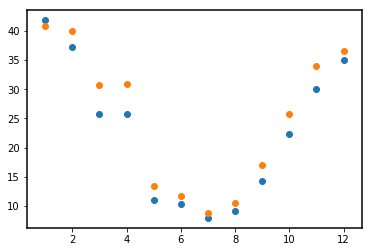

In [32]:
plt.scatter(month, densmld)
plt.scatter(month,tempmld)


In [26]:
month = [1,2,3,4,5,6,7,8,9,10,11,12]
#Polygon x
x_diff = [-0.9029850746268657, 2.8623063683304646, 4.960732984293194, 5.252559726962457, 2.4163090128755367, 1.304812834224599, 0.782608695652174, 1.3408071748878925, 2.7566807313642756, 3.554089709762533, 4.057926829268292, 1.3928571428571428]
#Polygon v
v_diff = [-0.13286713286713286, 2.0911062906724514, 3.9309878213802434, 7.539007092198582, 1.1372549019607843, 0.8884615384615384, 0.9607250755287009, 1.3756476683937824, 3.2596685082872927, 3.4918032786885247, 5.5739514348785875, np.nan]
#Polygon w
w_diff = [4.44520202020202, 4.126711560044893, 4.706179775280899, 7.259378596087457, 2.647987012987013, 2.312543962485346, 2.6778523489932886, 2.5953878406708597, 2.6410958904109587, 4.17585931254996, 6.410958904109589, 6.054545454545455]
#Polygon y
y_diff = [11.10735294117647, 2.7830188679245285, 10.024489795918367, 14.897084048027445, 4.8373737373737375, 1.9558823529411764, 0.8888888888888888, 1.8952879581151831, 1.7943548387096775, 8.077922077922079, 16.100840336134453, 2.6]
#Polygon t
t_diff = [12.178723404255319, 3.4130434782608696, 10.780745341614907, 7.991599539700806, 1.3759677419354839, 1.2523076923076923, 0.9166666666666666, 1.1244979919678715, 1.4823008849557522, 5.487868284228769, 13.727152317880794, 16.54237288135593]

In [1582]:
t_wgom = []; t_wgom_interan = []
variablelist_003_full_mean = []; variablelist_003_full_std = []
variablelist_003_interann_mean = []; variablelist_003_interann_std = []
fulllistnow = []
for i in range(len(full)):
    season = full[i]
    
    variablelist_003 = []; yearlist = []; ratio100 = []; variablelist_02 = []
    variablelist_02 = []; variablelist_001 = []; diff = []
    
    newdf = pd.DataFrame({'lon': list(season['obs_lon_y']),'lat': list(season['obs_lat'])})
    
    for ii in range(len(season)):
        new = newdf.iloc[ii].values
        point = Point(new)
#         if polygon_y.contains(point) == True and (season['003densmld'][ii]>5):
        if polygon_v.contains(point) == True and (season['003densmld'][ii]>5) and (season['bottomdepth'][ii]<=200) : #and (season['bottomdepth'][ii]<=200) 
            variablelist_003.append(season['003densmld'][ii])
            yearlist.append(season['year'][ii])
            variablelist_02.append(season['glorys_mld'][ii])
            diff.append(season['glorys_mld'][ii] - season['003densmld'][ii])
        else:
            pass
    pandas = pd.DataFrame({'year': yearlist, 'diff':diff})
    interannual_grouped_003 = pandas.groupby(['year']).mean()
    fulllistnow.append(np.nanmean(interannual_grouped_003))
print(fulllistnow)

#     interannual_grouped_003 = pandas.groupby(['year']).mean()
#     variablelist_003_interann_mean.append(np.nanmean(interannual_grouped_003))
#     variablelist_003_full_mean.append(np.nanmean(pandas['variable']))
    
#     variablelist_003_interann_std.append(np.nanstd(interannual_grouped_003))
#     variablelist_003_full_std.append(np.nanstd(pandas['variable']))

[-3.760876058454179, -7.036793884416403, -6.351192998350034, -11.354555940366053, 0.8360944498592302, 2.252501431732383, 2.095025751739496, 2.1082139361107255, 0.350876603813979, -2.6913519832698185, -0.8110272388224012, nan]


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: Mean of empty slice


In [1594]:
# GMLD003 - obs
t_diff = [4.496340871312345, 2.7199377460155207, 5.1605401149271035, -4.413356322241078, -3.0311702827924343, -3.593288727155602, -1.9478622542487252, -1.0243281610053947, -0.7444645572858715, 3.77357532594042, 6.406736812818335, 19.63737661477291]
w_diff = [6.397317551535839, 4.19995484635048, -8.169369259733653, -8.837109936020443, -17.10691606585692, -18.29411731458958, -4.040982647242674, -9.130011701061735, -1.6605150226069412, 0.6797547264105138, 8.11133887944702, 5.736659655238201]
y_diff = [7.181263212135175, 9.749774915371102, 0.5962111367875812, -2.506373697377415, -1.7104249869302683, -3.5110483795986833, -1.9460791758128575, -0.8476919404523713, -2.2581680586006603, 4.644674708034424, 11.46315886413683, 20.729930877685547]
x_diff = [-6.540594812408309, -2.6458579702462877, -6.34020981637951, -7.298456564239187, -3.8624482017187844, -4.897078241690612, -0.7287708009992327, -2.4611640356778, -1.159695669276832, -1.5062180529203832, 1.6991573579081827, 3.056737902985901]
v_diff = [4.69059208509382, 2.3489136333054317, -1.2885446672749472, -6.642897950874381, -3.9045049799049005, -0.8199602337006642, -1.7631884272718605, -1.3467366760094432, 0.6862887249979006, 1.2046092466678469, 3.753787429974444, np.nan]


In [1590]:
# GMLD - obs
t_diff = [-12.02963996418052, -15.272679362520924, -12.12171295575721, -9.604576084073386, -2.693198737663766, 0.05501061155987736, 2.2491137615975476, 1.8310712471515527, -1.626136789474589, -0.7743848162498039, -0.2019382578813486, 4.930351612784644]
w_diff = [-3.118039125624735, -5.149256682050754, -18.062966447263573, -18.236205369391204, -16.73206733240658, -16.4803961154321, -1.8692502335658199, -6.528750809044113, -4.873784121563386, -5.005048487781361, 0.3060755998802959, 0.2444938581881646]
y_diff = [-1.0285665198988263, -1.382092166780405, -10.782026674914079, -7.894195753210137, -3.6187779525288373, -1.5867746988221287, 1.8766131140969007, 1.4355255240957412, -3.2256982029825862, -0.3042522124184832, 4.995963434215768, 12.603841400146484]
x_diff = [-14.103843570393142, -11.613069253853743, -9.724437336115283, -12.134021421338256, 0.4615665989939175, -0.6362979980264212, 2.732343739680467, 1.6797150049025362, -1.8227027839671468, -4.191074086404629, -4.347161411998676, -1.469349622592872]
v_diff = [-3.760876058454179, -7.036793884416403, -6.351192998350034, -11.354555940366053, 0.8360944498592302, 2.252501431732383, 2.095025751739496, 2.1082139361107255, 0.350876603813979, -2.6913519832698185, -0.8110272388224012, np.nan]


In [1596]:
t_diff = [12.26013986013986, 3.5258620689655173, 10.961818181818183, 7.810807860262009, 1.5905247813411076, 1.5755208333333333, 1.3026315789473684, 1.3396226415094339, 1.5630252100840336, 5.760469011725293, 14.536895674300254, 16.54237288135593]
y_diff = [11.14927536231884, 2.7830188679245285, 10.484615384615385, 15.12106135986733, 4.7961352657004825, 2.243478260869565, 0.9523809523809523, 1.9683794466403162, 1.8250950570342206, 8.455384615384615, 16.46831955922865, 2.6]

w_diff = [4.6457500000000005, 4.254069119286511, 4.874723247232473, 7.49179229480737, 2.9641337386018236, 2.508700322234157, 2.661064425770308, 2.7387543252595155, 2.8625, 4.307395993836672, 6.523952095808383, 7.626086956521739]
v_diff = [1.034013605442177, 2.975, 4.393939393939394, 7.713286713286713, 1.4063324538258575, 1.0787878787878789, 1.3628318584070795, 1.647887323943662, 3.4974747474747474, 4.139705882352941, 6.016632016632016, np.nan]
x_diff = [-0.5851851851851851, 3.1848739495798317, 5.331318016928658, 5.369127516778524, 2.5343511450381677, 1.368421052631579, 1.3358778625954197, 1.462837837837838, 2.992356687898089, 3.7375, 4.296187683284457, 2.0350877192982457]


In [785]:
t_diff[7:11]

[1.3396226415094339, 1.5630252100840336, 5.760469011725293, 14.536895674300254]

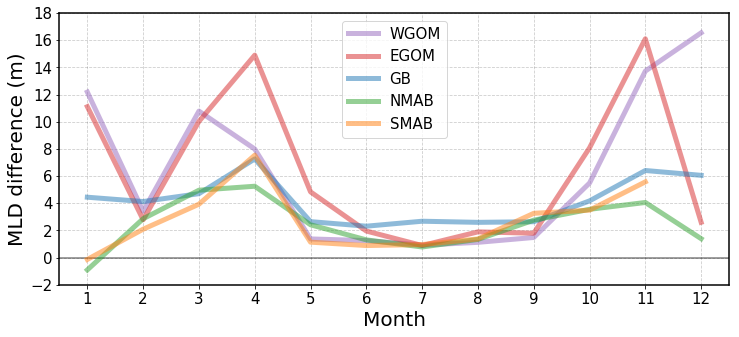

In [28]:
plt.figure(figsize=(12,5))

# plt.ylim(-5,35)
plt.xlim(0.5,12.5)

plt.plot(month, t_diff, linestyle='-', color='tab:purple', linewidth=5,alpha = 0.5, zorder= 30, label='WGOM')
# plt.fill_between(month, np.asarray(meandiff_WGOM) - np.asarray(stddiff_WGOM ), np.asarray(meandiff_WGOM) + np.asarray(stddiff_WGOM ),color = 'tab:purple', alpha = 0.1,zorder = 30)

plt.plot(month, y_diff, linestyle='-', color='tab:red', linewidth=5,alpha = 0.5, zorder= 30,label='EGOM')
# plt.fill_between(month, np.asarray(meandiff_EGOM) - np.asarray(stddiff_EGOM ), np.asarray(meandiff_EGOM) + np.asarray(stddiff_EGOM ),color = 'tab:red', alpha = 0.1,zorder = 30)

plt.plot(month, w_diff, linestyle='-', color='tab:blue', linewidth=5,alpha = 0.5, zorder= 30,label='GB')
# plt.fill_between(month, np.asarray(meandiff_GB) - np.asarray(stddiff_GB ), np.asarray(meandiff_GB) + np.asarray(stddiff_GB),color = 'tab:blue', alpha = 0.1,zorder = 30)

plt.plot(month, x_diff, linestyle='-', color='tab:green', linewidth=5,alpha =0.5, zorder= 30,label='NMAB')
# plt.fill_between(month, np.asarray(meandiff_NMAB) - np.asarray(stddiff_NMAB ), np.asarray(meandiff_NMAB) + np.asarray(stddiff_NMAB),color = 'tab:green', alpha = 0.1,zorder = 30)

plt.plot(month, v_diff, linestyle='-', color='tab:orange', linewidth=5,alpha = 0.5, zorder= 30,label='SMAB')
# plt.fill_between(month, np.asarray(meandiff_SMAB) - np.asarray(stddiff_SMAB ), np.asarray(meandiff_SMAB) + np.asarray(stddiff_SMAB),color = 'tab:orange', alpha = 0.1,zorder = 30)

plt.xlabel('Month', fontsize = 20)
plt.ylabel('MLD difference (m)', fontsize = 20)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 15) 
plt.yticks([-2,0,2,4,6,8,10,12,14,16,18], fontsize = 15) 
# plt.yticks([-20,-15,-10,-5,0,5,10,15,20,25], fontsize = 15) 
mpl.rcParams['axes.linewidth'] = 1.5
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
# plt.savefig('seasonal_SMAB')
plt.legend(fontsize = 15)
# plt.text(11, -15, 'b.', dict(size=30))


plt.savefig('diff_seasonalcycle_sec33')

plt.show()

In [766]:
print(interannual_grouped_003)

         variable  variable2
year                        
1993.0  28.928571  35.857143
1994.0  13.000000  86.000000
2010.0  47.843750  68.242424
2011.0  20.750000  36.000000


In [759]:
#second try
t_wgom = []; t_wgom_interan = []
variablelist_003_full_mean = []; variablelist_003_full_std = []
variablelist_003_interann_mean = []; variablelist_003_interann_std = []

for i in range(len(full)):
    season = full[i]
    
    variablelist_003 = []; yearlist = []; ratio100 = []
    variablelist_02 = []; variablelist_001 = []
    
    newdf = pd.DataFrame({'lon': list(season['obs_lon']),'lat': list(season['obs_lat'])})
    
    for ii in range(len(season)):
        new = newdf.iloc[ii].values
        point = Point(new)
#         if polygon_x.contains(point) == True and (season[variable][ii]>5 and (season['bottomdepth'][ii]<=200) ):
        if polygon_w.contains(point) == True and (season[variable][ii]>5): #and (season['bottomdepth'][ii]<=200) 
            variablelist_003.append(season['003densmld'][ii]/season['bottomdepth'][ii])
            yearlist.append(season['year'][ii])
        else:
            pass
    pandas = pd.DataFrame({'year': yearlist, 'variable': variablelist_003})

    interannual_grouped_003 = pandas.groupby(['year']).mean()
    variablelist_003_interann_mean.append(np.nanmean(interannual_grouped_003))
    variablelist_003_full_mean.append(np.nanmean(pandas['variable']))
    
    variablelist_003_interann_std.append(np.nanstd(interannual_grouped_003))
    variablelist_003_full_std.append(np.nanstd(pandas['variable']))

TypeError: object of type 'function' has no len()

In [359]:
print(variablelist_003_interann_mean)
print(np.nanmax(variablelist_003_interann_mean)-np.nanmin(variablelist_003_interann_mean))
print('----')
print(variablelist_003_interann_std)
print('*************')
print(variablelist_003_full_mean)
print('----')
print(variablelist_003_full_std)

[0.7303180884627286, 0.6192695810798212, 0.6485214425868217, 0.5765560820325208, 0.4775110059921264, 0.4793816753025719, 0.20497510498562022, 0.32333480776414414, 0.3311038530195716, 0.4410537910671387, 0.5419546660740363, 0.48390275528669857]
0.5253429834771084
----
[0.22873960664999293, 0.23517476414473387, 0.15437907079693322, 0.10537774059919405, 0.1747172901950363, 0.18514069913943706, 0.14285871575665618, 0.07955259245921953, 0.13229099823806537, 0.0698190228094201, 0.12001309261813084, 0.20717752889748203]
*************
[0.7841624091657299, 0.6957319187164759, 0.7236210288051876, 0.6017994604984837, 0.4642084129599715, 0.45687042091176333, 0.28932337557520843, 0.33756526003673776, 0.3361477796025522, 0.44592088724951706, 0.5559147100226848, 0.6481862138310076]
----
[0.3239710074279786, 0.36926520025773346, 0.35780801655274047, 0.39827780170483007, 0.39881935376454547, 0.4117451245245466, 0.33046004447355437, 0.3616604737399712, 0.3320064224783738, 0.3659225644784292, 0.366262640

In [357]:
v = 0.48833749479263944
x = 0.57
y = 0.28
t = 0.57
w = 0.53

In [740]:
# t - WGOM
t_interann_mean = [77.63612082362083, 76.58427074378723, 47.11937901046944, 23.767593334021303, 14.213895361495279, 9.989254176825066, 8.395380545380545, 8.613781159930541, 14.507450874211289, 21.530618466664727, 29.866914636155485, 27.770003434065934]
t_interann_std = [23.881205318127588, 22.163653149324528, 25.75263860701069, 8.93739728976784, 6.114724870826616, 1.893303141680592, 1.3551030259804402, 0.9288722655169662, 5.717136370307165, 4.339653089437496, 8.05646594556539, 12.88615582250593]

t_full_mean = [70.92937062937062, 73.20470085470086, 45.395031055900624, 23.053249714937287, 13.573642172523963, 10.210030395136778, 7.967213114754099, 8.592, 12.746136865342164, 20.88802756244617, 30.109660574412533, 37.1]
t_full_std = [39.30110557737394, 39.69174088070819, 42.1768633423178, 20.33720585820339, 8.99988774298527, 4.982399691514745, 2.3044306086302404, 2.968086252115999, 6.468433409377796, 10.64514315797003, 17.75812205275107, 19.4659531832719]

In [741]:
t_t_interann_mean = [77.60305307041138, 76.07605374493656, 46.976156204906204, 22.964314689686244, 13.41388808156251, 9.409531986709249, 7.76, 7.863695002545886, 13.85803293862544, 21.08977173918193, 28.949185490204044, 27.630580357142858]
t_interann_std = [24.28890153248414, 23.10338673900495, 25.91670228102043, 8.097173728100334, 6.265734107253439, 1.8347611756690434, 1.6486223204711123, 1.0128258422103646, 5.7430448811765045, 4.50421617574191, 8.560625762532368, 12.958137168111245]

t_t_full_mean = [70.55874125874125, 72.2969827586207, 44.41575757575758, 22.172161572052403, 12.800437317784256, 9.449479166666666, 7.355263157894737, 7.820754716981132, 12.369747899159664, 20.358458961474035, 29.170483460559797, 37.25423728813559]
t_t_full_std = [39.79091917467126, 39.9130395191205, 42.1231771680284, 20.204106983376636, 8.946179361782583, 4.970899664923105, 2.404513012126315, 3.0181750384094275, 6.527402543895897, 10.849533547333474, 18.07297742481349, 19.59383612896615]


In [742]:
t_diff = [-0.03306775320945121, -0.5082169988506706, -0.14322280556323363, -0.8032786443350588, -0.8000072799327693, -0.5797221901158167, -0.6353805453805457, -0.7500861573846551, -0.6494179355858485, -0.4408467274827963, -0.9177291459514407, -0.13942307692307665]

In [743]:
# y - EGOM
y_interann_mean = [36.88676561533704, 49.39228021978022, 39.544160997732426, 22.751203250356173, 14.929345469345467, 11.909052984052984, 9.154444444444445, 8.936686745405233, 13.55867735919692, 22.21895743257817, 29.579788853826198, 30.0]
y_interann_std = [6.812222664474478, 19.93182203106897, 9.06225229078431, 6.053640365833036, 4.401665155991777, 3.192428520985311, 2.2492492574684166, 1.4413827734435936, 5.723638226393854, 7.000971759446131, 8.851740386863224, 0.0]

y_full_mean = [35.39411764705883, 51.12830188679246, 39.48979591836735, 22.482402707275803, 14.1105, 11.257281553398059, 9.105263157894736, 9.134715025906736, 12.939516129032258, 23.0, 28.83240223463687, 30.0]
y_full_std = [21.420707973916414, 32.24399243362719, 22.381052891447695, 16.528106451025764, 8.00979024382037, 7.982646250068794, 3.3544116566585664, 3.7654671759961995, 13.395668044054917, 12.766765105622328, 15.547722904829442, 5.138093031466052]

In [744]:
y_t_interann_mean = [36.41482683982684, 49.39228021978022, 38.445408163265306, 22.30372664757301, 14.663551112286406, 10.86792576110758, 8.58015873015873, 8.085552716567753, 13.213440541253602, 21.414680663799754, 28.734626203976052, 30.0]
y_interann_std = [7.272867511467423, 19.93182203106897, 9.518028526673417, 6.141137314011716, 4.466615886046566, 3.0406098752506105, 2.029619577936059, 1.5137142070159526, 5.893385811557177, 7.011744304934744, 8.637328087492865, 0.0]

y_t_full_mean = [34.9536231884058, 51.12830188679246, 37.5, 22.079601990049753, 13.77342995169082, 10.595652173913043, 8.619047619047619, 8.138339920948617, 12.486692015209126, 22.044615384615383, 28.40220385674931, 30.0]
y_t_full_std = [21.572927073642084, 32.24399243362719, 23.166379817445666, 16.5858537850353, 8.06739841714407, 7.798800256721185, 3.477494862906623, 3.740684399114928, 13.137717944280597, 13.02953486116158, 15.720289064007796, 5.138093031466052]


In [745]:
y_diff = [-0.47193877551020336, 0.0, -1.0987528344671205, -0.44747660278316204, -0.26579435705906107, -1.0411272229454038, -0.5742857142857147, -0.85113402883748, -0.3452368179433183, -0.8042767687784149, -0.8451626498501454, 0.0]

In [746]:
# w - GB
w_interann_mean = [45.87871232729774, 43.05388364726566, 46.123540607538885, 36.898723737204506, 28.3578018869253, 27.0135220750393, 12.341695462135002, 18.062304882067195, 19.37471301859538, 26.785235661683227, 34.009863697723986, 31.084303830227743]
w_interann_std = [12.231149798781525, 13.708929140498523, 7.4410849328714495, 5.757057133905317, 9.661781395824972, 8.948665264123099, 6.75988689209525, 3.1546285835828964, 7.019044768338656, 4.11852745277979, 6.589974874211203, 10.304874898133038]

w_full_mean = [50.23834586466165, 47.991508379888266, 48.1074211502783, 38.73239839725243, 27.812276214833762, 25.295828505214367, 16.36963696369637, 18.58792924037461, 18.90566037735849, 27.23449920508744, 34.43920972644377, 38.42727272727273]
w_full_std = [21.726057216534183, 24.158187606918016, 22.163845533269548, 23.121666779695488, 22.02990504523844, 21.006598449704715, 16.432138743833303, 16.897648057167, 15.499734639342936, 17.34201508102069, 19.752267708256404, 19.30824557300425]

In [747]:
w_t_interann_mean = [45.43900458533204, 42.8508600719754, 45.68424517521861, 36.061048430185025, 25.551178711549227, 25.708686119442362, 10.350803257871698, 15.595607661980262, 18.18291811739533, 26.00129461521162, 33.54949169519571, 29.941835181561206]
w_interann_std = [12.187713093197305, 13.874870701854025, 7.858648578770108, 5.797594664723774, 10.036158401100492, 9.072945172736569, 5.621594771211317, 3.1329165511192394, 6.517506140479188, 4.448332731826631, 6.949200629442676, 10.18526660685669]

w_t_full_mean = [49.865249999999996, 47.74960981047938, 47.63634686346864, 37.756281407035175, 26.55489361702128, 23.681310418904403, 14.61624649859944, 16.231833910034602, 17.7275, 26.46302003081664, 33.98203592814371, 36.97391304347826]
w_t_full_std = [22.05181437971715, 24.305445810709575, 22.453304310890896, 23.50376814811491, 22.08210863222119, 20.911705714187622, 15.696386296659888, 16.223937537846037, 15.401566275869477, 17.53835165746553, 19.946552252286615, 20.076575521938267]


In [748]:
w_diff = [-0.47193877551020336, 0.0, -1.0987528344671205, -0.44747660278316204, -0.26579435705906107, -1.0411272229454038, -0.5742857142857147, -0.85113402883748, -0.3452368179433183, -0.8042767687784149, -0.8451626498501454, 0.0]


In [749]:
# v - SMAB
v_interann_mean = [40.00623850578669, 35.16451555210125, 24.741979411319313, 24.967145220371027, 10.099996972348242, 8.346714587394413, 8.139741277598368, 8.678312740108568, 11.86247134745939, 21.44186050579302, 22.101139934122504, np.nan]
v_interann_std = [6.082155982829275, 6.393524317557544, 5.927920331631215, 4.78463172453019, 2.8958852485845616, 1.430843159626742, 1.459193339007676, 1.3664179465767483, 1.5779663611438333, 7.691443823266557, 5.631224446275697, np.nan]

v_full_mean = [40.37931034482759, 35.482067510548525, 24.645502645502646, 24.732394366197184, 10.407166123778502, 8.511450381679388, 8.61631419939577, 8.875647668393782, 11.89076923076923, 22.5859375, 22.7987012987013, np.nan] 
v_full_std = [24.082349801009222, 24.8969753798965, 20.027229965506034, 16.109185330533922, 6.423213254779638, 2.8361526789879257, 2.5499670653185413, 2.679818592616661, 5.447687528510058, 13.09074538542759, 12.8947016889383, np.nan]

In [750]:
v_t_interann_mean = [39.26238040504977, 33.782455390943696, 23.26338638111752, 24.882047774134467, 9.123183033941991, 7.658152947564403, 7.449342900982521, 7.792224212560793, 10.523787003464676, 20.079522497704318, 21.26256349022726, np.nan]
v_interann_std = [5.953393297761837, 6.1882301937549, 6.14693222916014, 4.796282998477088, 2.8336043000539077, 1.1391921850781737, 1.526449404801662, 1.2304534935583031, 1.3124399777185376, 7.361406621904945, 6.133338937942968, np.nan]

v_t_full_mean = [39.54421768707483, 34.06666666666667, 22.989486703772418, 24.51048951048951, 9.37203166226913, 7.754545454545455, 7.648230088495575, 8.010060362173038, 10.509469696969697, 21.235294117647058, 21.694386694386694, np.nan]
v_t_full_std = [24.446869029394488, 25.057345341347627, 19.787285968707252, 16.207080871944527, 6.16153347933284, 2.8778770488921075, 2.7065426236451473, 2.860593886007282, 5.610340491079788, 13.616185920849563, 13.196111917462709, np.nan]


In [751]:
v_diff = [-0.7438581007369223, -1.382060161157554, -1.4785930302017931, -0.0850974462365599, -0.9768139384062504, -0.6885616398300094, -0.690398376615847, -0.8860885275477752, -1.3386843439947143, -1.3623380080887024, -0.8385764438952421, np.nan]

In [752]:
# x - NMAB
x_interann_mean = [47.50454086145182, 38.05302555347199, 24.831593289991343, 28.00067389244499, 10.474800196798249, 10.883371148831674, 7.938389475108225, 8.979964517878436, 14.341588774987834, 22.697960300512158, 30.45852817060247, 36.616002126528436]
x_interann_std = [12.024957007541886, 10.127778016456887, 8.816115321036987, 7.1250801559301635, 2.6312546893487223, 3.865424972207377, 1.5226215604007658, 2.311006835586132, 4.015323541677856, 4.9450775515982235, 6.765727525808772, 9.823615161814445]

x_full_mean = [42.214814814814815, 37.34863945578231, 25.632390745501286, 25.54054054054054, 10.978813559322035, 10.354497354497354, 7.8936170212765955, 9.192825112107624, 14.3187414500684, 22.288311688311687, 30.053097345132745, 35.107142857142854]
x_full_std = [18.132183454221895, 19.596418218451472, 18.6051124823181, 15.115044580840273, 6.9984544503807005, 5.945630504988084, 3.266425221196365, 4.529281177280468, 7.272000276356928, 12.357972073644618, 14.818970964137545, 15.183024556848927]

In [753]:
x_t_interann_mean = [47.291465800919134, 37.32209770825005, 23.587485543357843, 27.719085373613055, 9.97349836029983, 9.820604129162005, 7.110246059207998, 8.081338519095956, 13.699725871066818, 21.885161826492414, 29.706678375762852, 36.32153572336639]
x_interann_std = [12.14493516364667, 10.08507585616269, 8.977314809505074, 7.319675954458523, 2.68945299591821, 3.966605064320953, 1.6825995572540247, 2.023832789691734, 4.204187335469007, 5.305092472743787, 7.301928429811998, 10.16516073616906]

x_t_full_mean = [41.56296296296296, 36.4218487394958, 24.16324062877872, 25.345637583892618, 10.34732824427481, 9.37719298245614, 7.0534351145038165, 8.158783783783784, 13.435668789808917, 21.355, 29.04398826979472, 34.578947368421055]
x_t_full_std = [17.874711044505144, 19.942148092212687, 18.74454253555226, 15.208770797051455, 6.893240723410264, 5.7588838326402705, 3.072440850552052, 4.326824393435551, 7.445342345513211, 12.595196505017299, 15.443430037002152, 15.559672761206336]


In [754]:
x_diff = [-0.2130750605326881, -0.7309278452219417, -1.2441077466334995, -0.2815885188319349, -0.5013018364984188, -1.0627670196696695, -0.828143415900227, -0.8986259987824798, -0.641862903921016, -0.8127984740197434, -0.7518497948396181, -0.29446640316204764]

In [755]:
meandiff = [a_i - b_i for a_i, b_i in zip(x_t_interann_mean, x_interann_mean)]
print(meandiff)

[-0.2130750605326881, -0.7309278452219417, -1.2441077466334995, -0.2815885188319349, -0.5013018364984188, -1.0627670196696695, -0.828143415900227, -0.8986259987824798, -0.641862903921016, -0.8127984740197434, -0.7518497948396181, -0.29446640316204764]


In [756]:
month = [1,2,3,4,5,6,7,8,9,10,11,12]

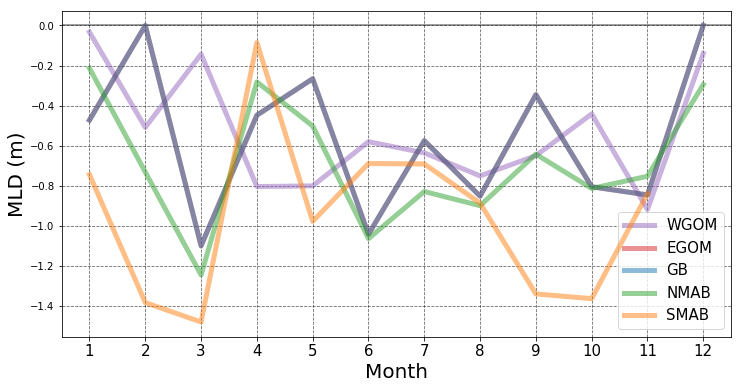

In [757]:
plt.figure(figsize=(12,6))
plt.figure(1)

# plt.ylim(-5,35)
plt.xlim(0.5,12.5)

plt.plot(month, t_diff, linestyle='-', color='tab:purple', linewidth=5,alpha = 0.5, zorder= 30, label='WGOM')
# plt.fill_between(month, np.asarray(meandiff_WGOM) - np.asarray(stddiff_WGOM ), np.asarray(meandiff_WGOM) + np.asarray(stddiff_WGOM ),color = 'tab:purple', alpha = 0.1,zorder = 30)

plt.plot(month, y_diff, linestyle='-', color='tab:red', linewidth=5,alpha = 0.5, zorder= 30,label='EGOM')
# plt.fill_between(month, np.asarray(meandiff_EGOM) - np.asarray(stddiff_EGOM ), np.asarray(meandiff_EGOM) + np.asarray(stddiff_EGOM ),color = 'tab:red', alpha = 0.1,zorder = 30)

plt.plot(month, w_diff, linestyle='-', color='tab:blue', linewidth=5,alpha = 0.5, zorder= 30,label='GB')
# plt.fill_between(month, np.asarray(meandiff_GB) - np.asarray(stddiff_GB ), np.asarray(meandiff_GB) + np.asarray(stddiff_GB),color = 'tab:blue', alpha = 0.1,zorder = 30)

plt.plot(month, x_diff, linestyle='-', color='tab:green', linewidth=5,alpha =0.5, zorder= 30,label='NMAB')
# plt.fill_between(month, np.asarray(meandiff_NMAB) - np.asarray(stddiff_NMAB ), np.asarray(meandiff_NMAB) + np.asarray(stddiff_NMAB),color = 'tab:green', alpha = 0.1,zorder = 30)

plt.plot(month, v_diff, linestyle='-', color='tab:orange', linewidth=5,alpha = 0.5, zorder= 30,label='SMAB')
# plt.fill_between(month, np.asarray(meandiff_SMAB) - np.asarray(stddiff_SMAB ), np.asarray(meandiff_SMAB) + np.asarray(stddiff_SMAB),color = 'tab:orange', alpha = 0.1,zorder = 30)

plt.xlabel('Month', fontsize = 20)
plt.ylabel('MLD (m)', fontsize = 20)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 15) 
# plt.yticks([-5,0,5,10,15,20,25,30,35], fontsize = 15) 
mpl.rcParams['axes.linewidth'] = 2
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.6)
# plt.savefig('seasonal_SMAB')
plt.legend(fontsize = 15)
# plt.savefig('diff_seasonalcycle')

plt.show()

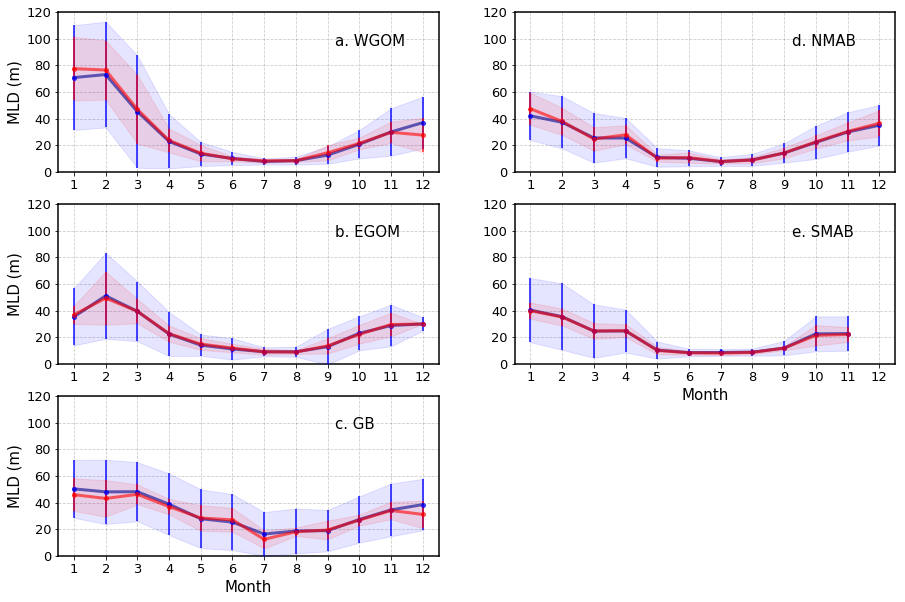

In [166]:
plt.figure(figsize=(15,10))

plt.subplot(321) #------------------------
plt.ylim(0,120)
plt.xlim(0.5,12.5)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)

plt.plot(month, t_full_mean, linestyle='-', color='darkblue', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(month,t_full_mean, t_full_std,linestyle='None', marker='o',color='blue',alpha= 0.7, markersize=4, zorder = 30,linewidth = 2)
plt.fill_between(month, np.asarray(t_full_mean) - np.asarray(t_full_std), np.asarray(t_full_mean) + np.asarray(t_full_std),color = 'blue', alpha = 0.1,zorder = 30)

plt.plot(month, t_interann_mean, linestyle='-', color='red', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(month,t_interann_mean, t_interann_std,linestyle='None', marker='o',color='red',alpha= 0.6, markersize=4, zorder = 30, linewidth=2)
plt.fill_between(month, np.asarray(t_interann_mean) - np.asarray(t_interann_std), np.asarray(t_interann_mean) + np.asarray(t_interann_std),color = 'red', alpha = 0.1,zorder = 30)

plt.ylabel('MLD (m)', fontsize = 15)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 13) 
plt.yticks([0,20,40,60,80,100,120], fontsize = 13) 
plt.text(9.25, 95, 'a. WGOM', dict(size=15))
mpl.rcParams['axes.linewidth'] = 1.5

plt.subplot(322) #------------------------
plt.ylim(0,120)
plt.xlim(0.5,12.5)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 13) 
plt.yticks([0,20,40,60,80,100,120], fontsize = 13) 
plt.text(9.25, 95, 'd. NMAB', dict(size=15))

plt.plot(month, x_full_mean, linestyle='-', color='darkblue', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(month,x_full_mean, x_full_std,linestyle='None', marker='o',color='blue',alpha= 0.7, markersize=4, zorder = 30,linewidth = 2)
plt.fill_between(month, np.asarray(x_full_mean) - np.asarray(x_full_std), np.asarray(x_full_mean) + np.asarray(x_full_std),color = 'blue', alpha = 0.1,zorder = 30)

plt.plot(month, x_interann_mean, linestyle='-', color='red', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(month,x_interann_mean, x_interann_std,linestyle='None', marker='o',color='red',alpha= 0.6, markersize=4, zorder = 30, linewidth=2)
plt.fill_between(month, np.asarray(x_interann_mean) - np.asarray(x_interann_std), np.asarray(x_interann_mean) + np.asarray(x_interann_std),color = 'red', alpha = 0.1,zorder = 30)
mpl.rcParams['axes.linewidth'] = 1.5

plt.subplot(323) #------------------------
plt.ylim(0,120)
plt.xlim(0.5,12.5)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 13) 
plt.yticks([0,20,40,60,80,100,120], fontsize = 13) 
plt.text(9.25, 95, 'b. EGOM', dict(size=15))
plt.ylabel('MLD (m)', fontsize = 15)

plt.plot(month, y_full_mean, linestyle='-', color='darkblue', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(month,y_full_mean, y_full_std,linestyle='None', marker='o',color='blue',alpha= 0.7, markersize=4, zorder = 30,linewidth = 2)
plt.fill_between(month, np.asarray(y_full_mean) - np.asarray(y_full_std), np.asarray(y_full_mean) + np.asarray(y_full_std),color = 'blue', alpha = 0.1,zorder = 30)

plt.plot(month, y_interann_mean, linestyle='-', color='red', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(month,y_interann_mean, y_interann_std,linestyle='None', marker='o',color='red',alpha= 0.6, markersize=4, zorder = 30, linewidth=2)
plt.fill_between(month, np.asarray(y_interann_mean) - np.asarray(y_interann_std), np.asarray(y_interann_mean) + np.asarray(y_interann_std),color = 'red', alpha = 0.1,zorder = 30)
mpl.rcParams['axes.linewidth'] = 1.5

plt.subplot(324) #------------------------
plt.ylim(0,120)
plt.xlim(0.5,12.5)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 13) 
plt.yticks([0,20,40,60,80,100,120], fontsize = 13) 
plt.text(9.25, 95, 'e. SMAB', dict(size=15))
plt.xlabel('Month', fontsize = 15)

plt.plot(month, v_full_mean, linestyle='-', color='darkblue', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(month,v_full_mean, v_full_std,linestyle='None', marker='o',color='blue',alpha= 0.7, markersize=4, zorder = 30,linewidth = 2)
plt.fill_between(month, np.asarray(v_full_mean) - np.asarray(v_full_std), np.asarray(v_full_mean) + np.asarray(v_full_std),color = 'blue', alpha = 0.1,zorder = 30)

plt.plot(month, v_interann_mean, linestyle='-', color='red', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(month,v_interann_mean, v_interann_std,linestyle='None', marker='o',color='red',alpha= 0.6, markersize=4, zorder = 30, linewidth=2)
plt.fill_between(month, np.asarray(v_interann_mean) - np.asarray(v_interann_std), np.asarray(v_interann_mean) + np.asarray(v_interann_std),color = 'red', alpha = 0.1,zorder = 30)
mpl.rcParams['axes.linewidth'] = 1.5

plt.subplot(325) #------------------------
plt.ylim(0,120)
plt.xlim(0.5,12.5)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 13) 
plt.yticks([0,20,40,60,80,100,120], fontsize = 13) 
plt.text(9.25, 95, 'c. GB', dict(size=15))
plt.ylabel('MLD (m)', fontsize = 15)
plt.xlabel('Month', fontsize = 15)

plt.plot(month, w_full_mean, linestyle='-', color='darkblue', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(month,w_full_mean, w_full_std,linestyle='None', marker='o',color='blue',alpha= 0.7, markersize=4, zorder = 30,linewidth = 2)
plt.fill_between(month, np.asarray(w_full_mean) - np.asarray(w_full_std), np.asarray(w_full_mean) + np.asarray(w_full_std),color = 'blue', alpha = 0.1,zorder = 30)

plt.plot(month, w_interann_mean, linestyle='-', color='red', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(month,w_interann_mean, w_interann_std,linestyle='None', marker='o',color='red',alpha= 0.6, markersize=4, zorder = 30, linewidth=2)
plt.fill_between(month, np.asarray(w_interann_mean) - np.asarray(w_interann_std), np.asarray(w_interann_mean) + np.asarray(w_interann_std),color = 'red', alpha = 0.1,zorder = 30)
mpl.rcParams['axes.linewidth'] = 1.5

plt.savefig('31fig1')
plt.show()

## 3.2 Comparison between density-based MLDs and temperature-based MLDs

In [60]:
winter = [dec, jan, feb]; winter_list = pd.concat(winter)
spring = [march, april, may]; spring_list = pd.concat(spring)
summer = [june, july, aug]; summer_list = pd.concat(summer)
fall = [sept, octob, dec]; fall_list = pd.concat(fall)

In [35]:
print(np.nanmin(winter_list['02tempmld']))

4.0


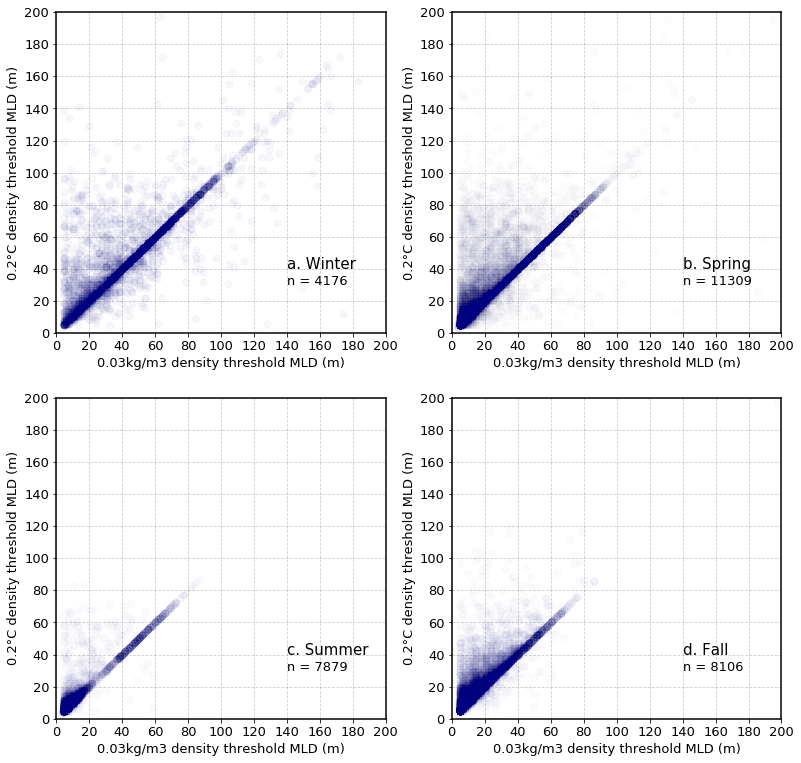

In [215]:
plt.figure(figsize=(13,13))

plt.subplot(221) #------------------------
plt.ylim(0,200)
plt.xlim(0,200)
plt.scatter(winter_list['003densmld'],winter_list['02tempmld'],s=50,alpha=0.03, color='navy')
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.yticks([0,20,40,60,80,100,120,140,160,180,200], fontsize = 13) 
plt.xticks([0,20,40,60,80,100,120,140,160,180,200], fontsize = 13) 
plt.text(140, 40, 'a. Winter', dict(size=15))
plt.text(140, 30, 'n = 4176', dict(size=13))
plt.xlabel('0.03kg/m3 density threshold MLD (m)', fontsize = 13)
plt.ylabel('0.2°C density threshold MLD (m)', fontsize = 13)

plt.subplot(222) #------------------------
plt.ylim(0,200)
plt.xlim(0,200)
plt.scatter(spring_list['003densmld'],spring_list['02tempmld'],s=50,alpha=0.011, color='navy')
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.yticks([0,20,40,60,80,100,120,140,160,180,200], fontsize = 13) 
plt.xticks([0,20,40,60,80,100,120,140,160,180,200], fontsize = 13) 
plt.text(140, 40, 'b. Spring', dict(size=15))
plt.text(140, 30, 'n = 11309', dict(size=13))
plt.xlabel('0.03kg/m3 density threshold MLD (m)', fontsize = 13)
plt.ylabel('0.2°C density threshold MLD (m)', fontsize = 13)

plt.subplot(223) #------------------------
plt.ylim(0,200)
plt.xlim(0,200)
plt.scatter(summer_list['003densmld'],summer_list['02tempmld'],s=50,alpha=0.016, color='navy')
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.yticks([0,20,40,60,80,100,120,140,160,180,200], fontsize = 13) 
plt.xticks([0,20,40,60,80,100,120,140,160,180,200], fontsize = 13) 
plt.text(140, 40, 'c. Summer', dict(size=15))
plt.text(140, 30, 'n = 7879', dict(size=13))
plt.xlabel('0.03kg/m3 density threshold MLD (m)', fontsize = 13)
plt.ylabel('0.2°C density threshold MLD (m)', fontsize = 13)

plt.subplot(224) #------------------------
plt.ylim(0,200)
plt.xlim(0,200)
plt.scatter(fall_list['003densmld'],fall_list['02tempmld'],s=50,alpha=0.0154, color='navy')
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.yticks([0,20,40,60,80,100,120,140,160,180,200], fontsize = 13) 
plt.xticks([0,20,40,60,80,100,120,140,160,180,200], fontsize = 13) 
plt.text(140, 40, 'd. Fall', dict(size=15))
plt.text(140, 30, 'n = 8106', dict(size=13))
plt.xlabel('0.03kg/m3 density threshold MLD (m)', fontsize = 13)
plt.ylabel('0.2°C density threshold MLD (m)', fontsize = 13)

plt.savefig('32fig1')
plt.show()

In [38]:
winter_sub = winter_list.dropna(subset=['003densmld', '02tempmld'], how='all')
print(len(winter_sub))

spring_sub = spring_list.dropna(subset=['003densmld', '02tempmld'], how='all')
print(len(spring_sub))

summer_sub = summer_list.dropna(subset=['003densmld', '02tempmld'], how='all')
print(len(summer_sub))

fall_sub = fall_list.dropna(subset=['003densmld', '02tempmld'], how='all')
print(len(fall_sub))

4176
11309
7879
8106


In [121]:
winter_sub_a = winter_sub[winter_sub['003densmld'] > 5]  
winter_sub_b = winter_sub_a[winter_sub_a['02tempmld'] > 5]  
winter_sub_b_reindex = winter_sub_b.reset_index()

spring_sub_a = spring_sub[spring_sub['003densmld'] > 5]  
spring_sub_b = spring_sub_a[spring_sub_a['02tempmld'] > 5]  
spring_sub_b_reindex = spring_sub_b.reset_index()

summer_sub_a = summer_sub[summer_sub['003densmld'] > 5]  
summer_sub_b = summer_sub_a[summer_sub_a['02tempmld'] > 5]  
summer_sub_b_reindex = summer_sub_b.reset_index()

fall_sub_a = fall_sub[fall_sub['003densmld'] > 5]  
fall_sub_b = fall_sub_a[fall_sub_a['02tempmld'] > 5]  
print(len(fall_sub_a))
print(len(fall_sub))
fall_sub_b_reindex = fall_sub_b.reset_index()

7011
8106


In [50]:
print(winter_sub_b)

      Unnamed: 0  001densmld  \
0              0        32.0   
1              1        40.0   
2              2        18.0   
3              3        24.0   
4              4        18.0   
...          ...         ...   
2962        2962         NaN   
2963        2963         NaN   
2964        2964         NaN   
2965        2965         NaN   
2966        2966         NaN   

                                               location    obs_lat    obs_lon  \
0                            (1993, 70.6833, 40.9, 335)  40.900000  70.683300   
1                          (1993, 70.3667, 41.035, 335)  41.035000  70.366700   
2                            (1993, 70.03, 41.065, 335)  41.065000  70.030000   
3                         (1993, 70.1333, 40.9317, 335)  40.931700  70.133300   
4                            (1993, 69.985, 40.93, 335)  40.930000  69.985000   
...                                                 ...        ...        ...   
2962                           (2013, 68.67, 43.

In [58]:
season = winter_sub_b_reindex
variablelist_003 = []; yearlist = []; ratio100 = []; variablelist_02 = []
for i in range(len(season)):
    newdf = pd.DataFrame({'lon': list(season['obs_lon']),'lat': list(season['obs_lat'])})
    new = newdf.iloc[ii].values
    point = Point(new)
    if polygon_x.contains(point) == True and (season['bottomdepth'][ii]<=200) :
        print('h')
        variablelist_003.append(season['003densmld'][ii])
        variablelist_02.append(season['02tempmld'][ii])
pandas = pd.DataFrame({'variablelist_003': variablelist_003, 'variablelist_02':variablelist_02})
# print(pandas)

h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h


In [59]:
print(len(variablelist_003))

3938


In [42]:
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr

corr, _ = pearsonr(winter_sub_b['003densmld'], winter_sub_b['02tempmld'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.840


In [36]:
from math import * ; from numpy import *; from scipy import *
# calculate means
data1 = one_first; data2 = two_second
mean1, mean2 = mean(data1), mean(data2)

# calculate sample standard deviations
std1, std2 = std(data1, ddof=1), std(data2, ddof=1)

# calculate standard errors
n1, n2 = len(data1), len(data2)
se1, se2 = std1/sqrt(n1), std2/sqrt(n2)

# standard error on the difference between the samples
sed = sqrt(se1**2.0 + se2**2.0)

# calculate the t statistic
t_stat = (mean1 - mean2) / sed

# degrees of freedom
df = n1 + n2 - 2

# calculate the critical value
alpha = 0.05
cv = stats.t.ppf(1.0 - alpha, df)

# calculate the p-value
p = (1 - stats.t.cdf(abs(t_stat), df)) * 2

print(t_stat, df, cv, p)

if p > alpha:
    print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

NameError: name 'one_first' is not defined

In [163]:
season = winter_list_reindex #spring_list_reindex
variable = '003densmld'

dens_v = []; temp_v = []
dens_x = []; temp_x = []
dens_w = []; temp_w = []
dens_y = []; temp_y = []
dens_t = []; temp_t = []

newdf = pd.DataFrame({'lon': list(season['obs_lon']),'lat': list(season['obs_lat'])})  
for ii in range(len(season)):
    new = newdf.iloc[ii].values
    point = Point(new)
    if polygon_x.contains(point) == True and (season[variable][ii]>5) and (season['bottomdepth'][ii]<=200) and (season['02tempmld'][ii]>5): 
        dens_x.append(season['003densmld'][ii])
        temp_x.append(season['02tempmld'][ii])
    if polygon_v.contains(point) == True and (season[variable][ii]>5) and (season['bottomdepth'][ii]<=200) and (season['02tempmld'][ii]>5): #and (season['bottomdepth'][ii]<=200) 
        dens_v.append(season['003densmld'][ii])
        temp_v.append(season['02tempmld'][ii])
    if polygon_w.contains(point) == True and (season[variable][ii]>5) and (season['02tempmld'][ii]>5): #and (season['bottomdepth'][ii]<=200) 
        dens_w.append(season['003densmld'][ii])
        temp_w.append(season['02tempmld'][ii])
    if polygon_t.contains(point) == True and (season[variable][ii]>5) and (season['02tempmld'][ii]>5): #and (season['bottomdepth'][ii]<=200) 
        dens_t.append(season['003densmld'][ii])
        temp_t.append(season['02tempmld'][ii])
    if polygon_y.contains(point) == True and (season[variable][ii]>5) and (season['02tempmld'][ii]>5): #and (season['bottomdepth'][ii]<=200) 
        dens_y.append(season['003densmld'][ii])
        temp_y.append(season['02tempmld'][ii])
        
pandasnew_x = pd.DataFrame({'dens': dens_x, 'temp':temp_x})
pandasnew_v = pd.DataFrame({'dens': dens_v, 'temp':temp_v})
pandasnew_w = pd.DataFrame({'dens': dens_w, 'temp':temp_w})
pandasnew_y = pd.DataFrame({'dens': dens_y, 'temp':temp_y})
pandasnew_t = pd.DataFrame({'dens': dens_t, 'temp':temp_t})


In [171]:
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
pandas_use = pandasnew_y
corr, _ = pearsonr(pandas_use['dens'], pandas_use['temp'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.835


In [172]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(pandas_use['dens'], pandas_use['temp']))
print(rms)

17.496641337712752
